In [1]:
import numpy as np
import scipy as sci
import matplotlib
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as Mcolors
import matplotlib.cm as cmx
import h5py
import seaborn as sns
import pywt # wavelet package
from scipy.signal import butter, lfilter, hilbert, cwt, morlet2, decimate, spectrogram, find_peaks
import pandas as pd
import os
import scipy.stats as ss
from scipy import stats
plt.rcParams['svg.fonttype']='none'
matplotlib.rcParams['pdf.fonttype'] = 42

# 10 Hz

In [2]:
def makeFilenames(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/{}_10Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'LFP_ts.h5'
    return directories, filenames

In [3]:
def makeFilenames_2(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/10Hz/{}_10Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'LFP_ts.h5'
    return directories, filenames

In [4]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [5]:
Base = "U:/eng_research_handata/eng_research_handata2/Sudi_Sridhar/"
Mice, Days = ([608451,608452], ['01062020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files1 = combineFilenames(Base, Folders, Filenames)
#Combine All Filenames into one List
Mice, Days = ([608450,611311,602101], ['03092020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files2 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608448], ['01172020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files3 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608451,608452,611111,602101,612535], ['07082020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files4 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([615883], ['02052021','03122021'])
Folders, Filenames = makeFilenames_2(Mice, Days)
Files5 = combineFilenames(Base, Folders, Filenames)
Files= Files1+Files2+Files3+Files4+Files5

In [6]:
def load_LFP_data_2(file):

    sess_name = file.split('/')[4]+'_'+file.split('/')[5]
    #print(sess_name)
    f = h5py.File(file,'r')
    #print(f.keys())
    LFP = np.array(f['lfp'])
    LFP=np.squeeze(LFP)
    #print(LFP.shape)
    start_frame=int(np.array(f['Start_imaging']))
    # Shifted df to account for delayed imaging start
    data=np.array(f['LFP_stim_onset'])
    onset_df = pd.DataFrame(data.T)
    data=np.array(f['LFP_stim_offset'])
    offset_df = pd.DataFrame(data.T)
    onset_df=onset_df.astype('int')
    offset_df=offset_df.astype('int')
    #print(shifted_offset_df-shifted_onset_df)
    return LFP,onset_df,offset_df,start_frame

In [7]:
def artifact_points(LFP):
    #LFP,shifted_onset_df,shifted_offset_df=load_LFP_data(file)
    up_thresh=np.mean(LFP)+5*np.std(LFP)
    low_thresh=np.mean(LFP)-5*np.std(LFP)
    artifact = np.full_like(LFP,False)
    artifact=artifact+(LFP>up_thresh)+(LFP<low_thresh)
    #print('found ',np.sum(artifact),' artifact points')
    #print(np.size(np.where(artifact==1)))
    idx=np.where(artifact==1)
    return idx,artifact 

In [8]:
def makeFilenames_motion(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/{}_10Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'processed_motion.h5'
    return directories, filenames

def makeFilenames_motion_2(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/10Hz/{}_10Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'processed_motion.h5'
    return directories, filenames

In [9]:
Base = "U:/eng_research_handata/eng_research_handata2/Sudi_Sridhar/"
Mice, Days = ([608451,608452], ['01062020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files1 = combineFilenames(Base, Folders, Filenames)
#Combine All Filenames into one List
Mice, Days = ([608450,611311,602101], ['03092020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files2 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608448], ['01172020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files3 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608451,608452,611111,602101,612535], ['07082020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files4 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([615883], ['02052021','03122021'])
Folders, Filenames = makeFilenames_motion_2(Mice, Days)
Files5 = combineFilenames(Base, Folders, Filenames)
motion_Files= Files1+Files2+Files3+Files4+Files5

In [10]:
def load_motion(Files,fieldName):
    firstf = Files[0]
    firstdir = firstf.split('/')[4]+'_'+firstf.split('/')[5]
    f = h5py.File(firstf, 'r')
    data=np.array(f[fieldName])
    df = pd.DataFrame(data)
    df.index=[firstdir]
   
    for f in Files[1:]: #Loop through remaining files and add to DataFrame
        fdir = f.split('/')[4]+'_'+f.split('/')[5] #Current Filename/Dir
        f = h5py.File(f, 'r')
        data=np.array(f[fieldName])
        df1 = pd.DataFrame(data)
        df1.index=[fdir]
        df = pd.concat([df,df1])
        #drop last minute
        df = df.iloc[: , :-1200]
    return df

In [11]:
motion_df=load_motion(motion_Files,'speed_trace')
moving_period_df=load_motion(motion_Files,'moving_period')
stationary_period_df=load_motion(motion_Files,'stationary_period')
motion_onsets_df=load_motion(motion_Files,'motion_onset_with')
raw_motion_df=load_motion(motion_Files,'raw_speed_trace')

In [12]:
sess_list_10Hz=[]
for i in np.arange(0,len(motion_Files),1):
    file=motion_Files[i]       
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    sess_list_10Hz.append(sess_name)

In [13]:
sess_list_10Hz

['608451_01062020',
 '608452_01062020',
 '608450_03092020',
 '611311_03092020',
 '602101_03092020',
 '608448_01172020',
 '608451_07082020',
 '608452_07082020',
 '611111_07082020',
 '602101_07082020',
 '612535_07082020',
 '615883_02052021',
 '615883_03122021']

In [14]:
def LFP_spect_all_periods(file_no):
    LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_no])
    x=LFP
    dt=0.001

    N = LFP.shape[0]
    a= np.arange(0,N,1)
    minS = 10
    maxS = 5000
    waveletName = 'cmor14.0-1.5'
    f = np.empty((maxS-minS,1))
    for j in range(minS,maxS):
        f[j-minS]=pywt.scale2frequency(waveletName , j)*(1/dt)
    [intF,inds] = np.unique(np.floor(f),return_index=True)
    #print(f[inds].T)
    dt=0.001
    scales = inds+minS
    
    file=motion_Files[file_no]
    sess_name= file.split('/')[6]+'_'+file.split('/')[7]
    [coefficients, frequencies] = pywt.cwt(LFP, scales, waveletName, dt)
    return sess_name,frequencies,abs(coefficients)

In [50]:
#  combine across sessions ...
f=h5py.File('spect_all_periods_10Hz.h5', "w")
for file_number in np.arange(0,len(Files),1):
    sess_name,frequencies,coefficients=LFP_spect_all_periods(file_number)
    dset1 = f.create_dataset(sess_name, data=coefficients)
    print(list(f.keys()))
dset2 = f.create_dataset('frequency', data=frequencies)
f.close()

['608451_01062020']
['608451_01062020', '608452_01062020']
['608450_03092020', '608451_01062020', '608452_01062020']
['608450_03092020', '608451_01062020', '608452_01062020', '611311_03092020']
['602101_03092020', '608450_03092020', '608451_01062020', '608452_01062020', '611311_03092020']
['602101_03092020', '608448_01172020', '608450_03092020', '608451_01062020', '608452_01062020', '611311_03092020']
['602101_03092020', '608448_01172020', '608450_03092020', '608451_01062020', '608451_07082020', '608452_01062020', '611311_03092020']
['602101_03092020', '608448_01172020', '608450_03092020', '608451_01062020', '608451_07082020', '608452_01062020', '608452_07082020', '611311_03092020']
['602101_03092020', '608448_01172020', '608450_03092020', '608451_01062020', '608451_07082020', '608452_01062020', '608452_07082020', '611111_07082020', '611311_03092020']
['602101_03092020', '602101_07082020', '608448_01172020', '608450_03092020', '608451_01062020', '608451_07082020', '608452_01062020', '6

### All bs vs all stim 

In [15]:
def get_hi_low_lfp_zscore(file_number,minS,maxS,freq):

    dt_motion=1/20
    dt_lfp=1/1000
    LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_number])
    t_motion = np.arange(0,43200) * dt_motion
    t_lfp = np.arange(0,LFP.shape[0]) * dt_lfp

    stim_indices=np.arange(int(shifted_onset_df.loc[0]),int(shifted_offset_df.loc[0])+60000,1)
    for i in np.arange(1,5,1):
        b=np.arange(int(shifted_onset_df.loc[i]),int(shifted_offset_df.loc[i])+60000,1)
        stim_indices=np.concatenate((stim_indices,b))
    all_indices=np.arange(0,LFP.shape[0],1)
    baseline_indices=np.setdiff1d(all_indices,stim_indices)
    # Need to remove NaN motion frames at start
    file=motion_Files[file_number]   
    sess_name= file.split('/')[6]+'_'+file.split('/')[7]
    motion=np.squeeze(np.array(motion_df.loc[sess_name,:]))
    nan_motion_frames=np.argwhere(np.isnan(motion))
    nan_motion_end=np.argmin(np.abs(t_lfp-t_motion[int(nan_motion_frames[-1])]))
    nan_indices=np.arange(0,nan_motion_end)
    baseline_indices=np.setdiff1d(baseline_indices,nan_indices)
    
    stim_indices=np.arange(int(shifted_onset_df.loc[0]),int(shifted_offset_df.loc[0]),1)
    for i in np.arange(1,5,1):
        b=np.arange(int(shifted_onset_df.loc[i]),int(shifted_offset_df.loc[i]),1)
        stim_indices=np.concatenate((stim_indices,b))


    stim_ind = np.full_like(t_lfp,False)
    stim_ind[stim_indices]=True
    baseline_ind = np.full_like(t_lfp,False)
    baseline_ind[baseline_indices]=True

    bs=baseline_ind
    stim=stim_ind

    # minS =9 to go above 150 Hz and minS=15 to go till 100, maxS=2000 for starting at 0.99 Hz
    if freq==10:
        f=h5py.File('spect_all_periods_10Hz.h5', "r")
    else:
        f=h5py.File('spect_all_periods_145Hz_2.h5', "r")
    coefficients=np.array(f[sess_name])
    frequencies=np.array(f['frequency'])
    f.close()
    outlier_points= artifact_points(LFP)[0]
    
    coefficients[:,outlier_points]=np.NaN

    coefficients= coefficients.T
    coefficients2 = stats.zscore(coefficients,axis=0,nan_policy='omit')
    
    sessH = (coefficients2[(bs ==1),:])
    sessL = (coefficients2[(stim ==1),:])

    sessH = np.nanmean(sessH,axis=0, keepdims=True)
    sessL = np.nanmean(sessL,axis=0, keepdims=True)
    return frequencies,np.squeeze(sessH),np.squeeze(sessL)

In [19]:
minS=15
maxS=5000
frequencies,sessH,sessL=get_hi_low_lfp_zscore(0,minS,maxS,10)

bs_speed_PSD= np.zeros((frequencies.shape[0],len(Files)))
stim_speed_PSD= np.zeros((frequencies.shape[0],len(Files)))
bs_speed_PSD[:,0]=np.squeeze(sessH)
stim_speed_PSD[:,0]=np.squeeze(sessL)

for i in np.arange(1,len(Files),1):
    print(i)
    _,sessH,sessL=get_hi_low_lfp_zscore(i,minS,maxS,10)
    bs_speed_PSD[:,i]=np.squeeze(sessH)
    stim_speed_PSD[:,i]=np.squeeze(sessL)

1
2
3
4
5
6
7
8
9
10
11
12


In [21]:
# Save the PSD's in a h5 file 
f1 = h5py.File('bs_stim_periods_10Hz.h5', "w")
dset1 = f1.create_dataset('bs', data=bs_speed_PSD)
dset2 = f1.create_dataset('stim', data=stim_speed_PSD)
dset5 = f1.create_dataset('frequencies', data=frequencies)
print(list(f1.keys()))
f1.close()

['bs', 'frequencies', 'stim']


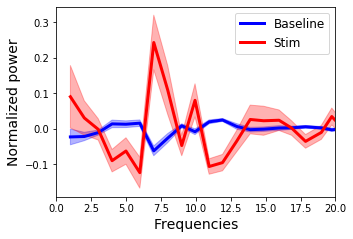

In [24]:
f1 = h5py.File('bs_stim_periods_10Hz.h5', "r")
baseline = np.array(f1['bs'])
stim = np.array(f1['stim'])
frequencies =np.array(f1['frequencies'])
f1.close()

baseline =np.delete(baseline,10,1)
stim =np.delete(stim,10,1)
freq=frequencies
l_mean= np.nanmean((baseline),axis=1)
l_std = np.nanstd((baseline),axis=1)
h_mean= np.nanmean((stim),axis=1)
h_std = np.nanstd((stim),axis=1)
h_std=h_std/np.sqrt(stim.shape[1])
l_std=l_std/np.sqrt(baseline.shape[1])
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
ax.plot(freq,l_mean,color ='blue', label='Baseline',linewidth=3.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='blue',alpha=0.3)
ax.plot(freq,h_mean,color ='red', label='Stim',linewidth=3.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='red',alpha=0.3)
ax.set_xlim(0,20)
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=12)
plt.savefig('mean_low_stim_vs_baseline_10Hz_0_20Hz.svg',dpi=1200,bbox_inches='tight')

## Low-speed vs high speed baseline 

In [22]:
f1 = h5py.File("high_low_speed_periods_10Hz.h5",'r+')
high_speed_baseline = np.array(f1['hi_speed_bs'])
low_speed_baseline = np.array(f1['low_speed_bs'])
high_speed_stim = np.array(f1['hi_speed_stim'])
low_speed_stim = np.array(f1['low_speed_stim'])
frequencies =np.array(f1['frequencies'])
f1.close()

high_speed_baseline =np.delete(high_speed_baseline,10,1)
low_speed_baseline =np.delete(low_speed_baseline,10,1)
high_speed_stim =np.delete(high_speed_stim,10,1)
low_speed_stim =np.delete(low_speed_stim,10,1)

In [23]:
f1 = h5py.File("high_low_speed_periods_145Hz.h5",'r+')
high_speed_baseline2 = np.array(f1['hi_speed_bs'])
low_speed_baseline2 = np.array(f1['low_speed_bs'])
high_speed_stim2 = np.array(f1['hi_speed_stim'])
low_speed_stim2 = np.array(f1['low_speed_stim'])
frequencies2 =np.array(f1['frequencies'])
f1.close()

high_speed_baseline2 =np.delete(high_speed_baseline2,11,1)
low_speed_baseline2 =np.delete(low_speed_baseline2,11,1)
high_speed_stim2 =np.delete(high_speed_stim2,11,1)
low_speed_stim2 =np.delete(low_speed_stim2,11,1)

In [24]:
high_speed_baseline_tot=np.concatenate((high_speed_baseline,high_speed_baseline2[0:63,:]),axis=1)
low_speed_baseline_tot=np.concatenate((low_speed_baseline,low_speed_baseline2[0:63,:]),axis=1)

high_speed_stim_tot=np.concatenate((high_speed_stim,high_speed_stim2),axis=1)
low_speed_stim_tot=np.concatenate((low_speed_stim,low_speed_stim2),axis=1)

Text(0.5, 0, 'Frequency(Hz)')

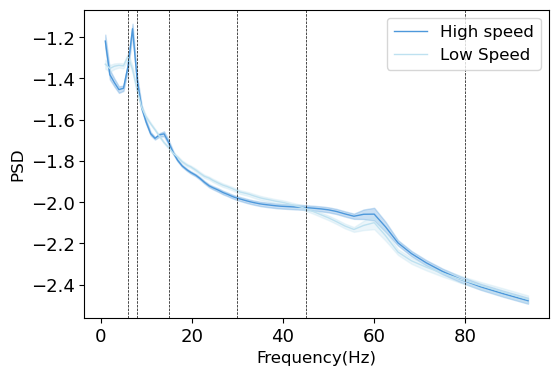

In [25]:
f1 = h5py.File("high_low_speed_periods_10Hz.h5",'r+')
frequencies =np.array(f1['frequencies'])
f1.close()
freq=frequencies
l_mean= np.nanmean(np.log10(low_speed_baseline_tot),axis=1)
l_std = np.nanstd(np.log10(low_speed_baseline_tot),axis=1)
l_std = np.nanstd(np.log10(low_speed_baseline_tot),axis=1)
h_mean= np.nanmean(np.log10(high_speed_baseline_tot),axis=1)
h_std = np.nanstd(np.log10(high_speed_baseline_tot),axis=1)
h_std=h_std/np.sqrt(high_speed_baseline_tot.shape[1])
l_std=l_std/np.sqrt(low_speed_baseline_tot.shape[1])
start_freq=0
stop_freq=100
start_index=np.squeeze(np.where(frequencies>start_freq))[0]
end_index=np.squeeze(np.where(frequencies<stop_freq))[-1]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(freq[start_index:end_index+1],h_mean[start_index:end_index+1],color ='#4D98DB', label='High speed',linewidth=1.0)
ax.fill_between(freq[start_index:end_index+1], h_mean[start_index:end_index+1]-h_std[start_index:end_index+1], h_mean[start_index:end_index+1]+h_std[start_index:end_index+1],color ='#4D98DB',alpha=0.3)

ax.plot(freq[start_index:end_index+1],l_mean[start_index:end_index+1],color ='#BEE1F0', label='Low Speed',linewidth=1.0)
ax.fill_between(freq[start_index:end_index+1], l_mean[start_index:end_index+1]-l_std[start_index:end_index+1], l_mean[start_index:end_index+1]+l_std[start_index:end_index+1],color='#BEE1F0',alpha=0.3)


plt.tick_params(axis='both', which='major', labelsize=13)
#ax.set_xlim(30,80)
#ax.set_ylim(-2.6,-1.8)
ax.legend(loc='upper right',fontsize=12)
ax.set_ylabel('PSD',fontsize=12)
#ax.axvline(x=2,linestyle='--',linewidth=0.5,color='k')
#ax.axvline(x=5,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=6,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=8,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=15,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=30,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=45,linestyle='--',linewidth=0.5,color='k')
ax.axvline(x=80,linestyle='--',linewidth=0.5,color='k')
ax.set_xlabel('Frequency(Hz)',fontsize=12)
#plt.savefig('mean_all_sess_low_high_baseline_ranges_marked.svg',dpi=1200,bbox_inches='tight')

Text(0.5, 0, 'Frequency(Hz)')

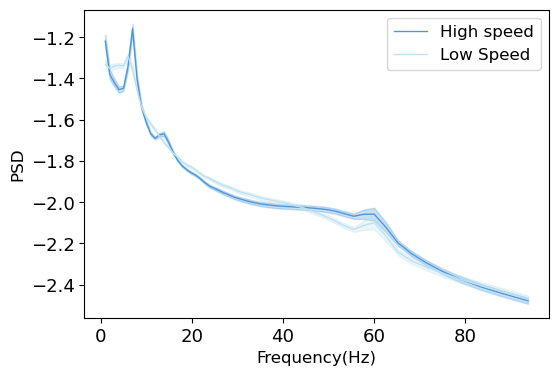

In [26]:
f1 = h5py.File("high_low_speed_periods_10Hz.h5",'r+')
frequencies =np.array(f1['frequencies'])
f1.close()
freq=frequencies
l_mean= np.nanmean(np.log10(low_speed_baseline_tot),axis=1)
l_std = np.nanstd(np.log10(low_speed_baseline_tot),axis=1)
l_std = np.nanstd(np.log10(low_speed_baseline_tot),axis=1)
h_mean= np.nanmean(np.log10(high_speed_baseline_tot),axis=1)
h_std = np.nanstd(np.log10(high_speed_baseline_tot),axis=1)
h_std=h_std/np.sqrt(high_speed_baseline_tot.shape[1])
l_std=l_std/np.sqrt(low_speed_baseline_tot.shape[1])
start_freq=0
stop_freq=100
start_index=np.squeeze(np.where(frequencies>start_freq))[0]
end_index=np.squeeze(np.where(frequencies<stop_freq))[-1]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(freq[start_index:end_index+1],h_mean[start_index:end_index+1],color ='#4D98DB', label='High speed',linewidth=1.0)
ax.fill_between(freq[start_index:end_index+1], h_mean[start_index:end_index+1]-h_std[start_index:end_index+1], h_mean[start_index:end_index+1]+h_std[start_index:end_index+1],color ='#4D98DB',alpha=0.3)
ax.plot(freq[start_index:end_index+1],l_mean[start_index:end_index+1],color ='#BEE1F0', label='Low Speed',linewidth=1.0)
ax.fill_between(freq[start_index:end_index+1], l_mean[start_index:end_index+1]-l_std[start_index:end_index+1], l_mean[start_index:end_index+1]+l_std[start_index:end_index+1],color='#BEE1F0',alpha=0.3)

plt.tick_params(axis='both', which='major', labelsize=13)
#ax.set_xlim(30,80)
#ax.set_ylim(-2.6,-1.8)
ax.legend(loc='upper right',fontsize=12)
ax.set_ylabel('PSD',fontsize=12)
ax.set_xlabel('Frequency(Hz)',fontsize=12)
#plt.savefig('mean_all_sess_low_high_baseline.svg',dpi=1200,bbox_inches='tight')

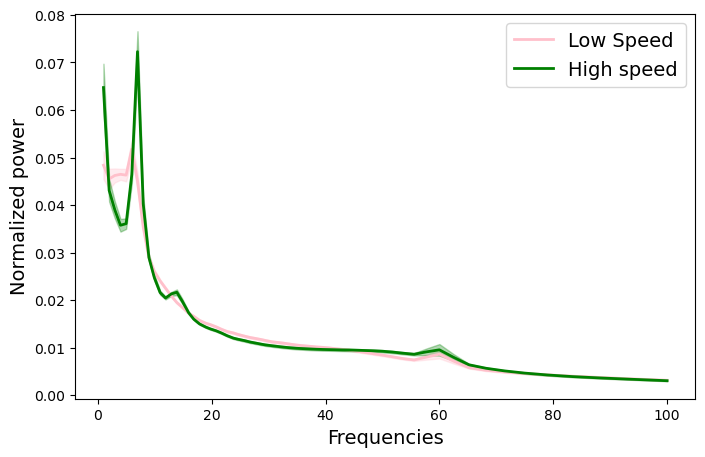

In [27]:
freq=frequencies
l_mean= np.nanmean(low_speed_baseline_tot,axis=1)
l_std = np.nanstd(low_speed_baseline_tot,axis=1)
h_mean= np.nanmean(high_speed_baseline_tot,axis=1)
h_std = np.nanstd(high_speed_baseline_tot,axis=1)
h_std=h_std/np.sqrt(high_speed_baseline_tot.shape[1])
l_std=l_std/np.sqrt(low_speed_baseline_tot.shape[1])
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot((freq),(l_mean),color ='pink', label='Low Speed',linewidth=2.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='pink',alpha=0.3)
ax.plot((freq),(h_mean),color ='green', label='High speed',linewidth=2.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='green',alpha=0.3)
#ax.set_xlim([0,40])
#ax.set_ylim([0,0.02])
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=14)
#plt.savefig('mean_all_low_high_baseline_zoom2.svg',dpi=1200,bbox_inches='tight')

In [20]:
def power_comp_method_1(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim):
    f1 = h5py.File("high_low_speed_periods_10Hz_zscore.h5",'r+')
    frequencies =np.array(f1['frequencies'])
    f1.close()
    start_index=np.squeeze(np.where(frequencies>start_freq))[0]
    end_index=np.squeeze(np.where(frequencies<stop_freq))[-1]
    hi_bs_power=np.nanmean(hi_bs[start_index:end_index+1])
    low_bs_power=np.nanmean(low_bs[start_index:end_index+1])
    hi_stim_power=np.nanmean(hi_stim[start_index:end_index+1])
    low_stim_power=np.nanmean(low_stim[start_index:end_index+1])
    return hi_bs_power,low_bs_power,hi_stim_power,low_stim_power

In [22]:
def power_comp_method_2(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim):
    f1 = h5py.File("high_low_speed_periods_145Hz_zscore.h5",'r+')
    frequencies =np.array(f1['frequencies'])
    f1.close()
    start_index=np.squeeze(np.where(frequencies>start_freq))[0]
    end_index=np.squeeze(np.where(frequencies<stop_freq))[-1]
    hi_bs_power=np.nanmean(hi_bs[start_index:end_index+1])
    low_bs_power=np.nanmean(low_bs[start_index:end_index+1])
    hi_stim_power=np.nanmean(hi_stim[start_index:end_index+1])
    low_stim_power=np.nanmean(low_stim[start_index:end_index+1])
    return hi_bs_power,low_bs_power,hi_stim_power,low_stim_power

In [84]:
def get_power_values_band_wise(start_freq,stop_freq):

    f1 = h5py.File("high_low_speed_periods_10Hz_zscore.h5",'r+')
    high_speed_baseline = np.array(f1['hi_speed_bs'])
    low_speed_baseline = np.array(f1['low_speed_bs'])
    high_speed_stim = np.array(f1['hi_speed_stim'])
    low_speed_stim = np.array(f1['low_speed_stim'])
    frequencies =np.array(f1['frequencies'])
    f1.close()

    high_speed_baseline =np.delete(high_speed_baseline,10,1)
    low_speed_baseline =np.delete(low_speed_baseline,10,1)
    hi_bs_list=[]
    low_bs_list=[]
    
    # Think of getting finer resolution!
    for i in np.arange(0,high_speed_baseline.shape[1],1):
        hi_bs = high_speed_baseline[:,i]
        low_bs = low_speed_baseline[:,i]
        hi_stim = high_speed_stim[:,i]
        low_stim = low_speed_stim[:,i]
        hi_bs_power,low_bs_power,_,_=power_comp_method_1(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim)
        hi_bs_list.append(hi_bs_power)
        low_bs_list.append(low_bs_power)
        
    
    f1 = h5py.File("high_low_speed_periods_145Hz_zscore.h5",'r+')
    high_speed_baseline = np.array(f1['hi_speed_bs'])
    low_speed_baseline = np.array(f1['low_speed_bs'])
    frequencies =np.array(f1['frequencies'])
    f1.close()
    high_speed_baseline =np.delete(high_speed_baseline,11,1)
    low_speed_baseline =np.delete(low_speed_baseline,11,1)

    hi_bs_list2=[]
    low_bs_list2=[]
    for i in np.arange(0,high_speed_baseline.shape[1],1):
        hi_bs = high_speed_baseline[:,i]
        low_bs = low_speed_baseline[:,i]
        hi_bs_power,low_bs_power,_,_=power_comp_method_2(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim)
        hi_bs_list2.append(hi_bs_power)
        low_bs_list2.append(low_bs_power)
    low_bs_list_tot=low_bs_list+low_bs_list2
    hi_bs_list_tot=hi_bs_list+ hi_bs_list2
    return low_bs_list_tot,hi_bs_list_tot

In [31]:
start_freq=15
stop_freq=30
low_bs_list_tot,hi_bs_list_tot=get_power_values_band_wise(start_freq,stop_freq)

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\2296118506.py:10: RuntimeWarning: Mean of empty slice
  low_stim_power=np.nanmean(low_stim[start_index:end_index+1])


In [19]:
def bandwise_power_plots(low_bs_list_tot,hi_bs_list_tot,sig_bar,space,T):
    data={'Low':low_bs_list_tot,'High':hi_bs_list_tot}
    df=pd.DataFrame(data)
    plt.figure(figsize=(2.5,2.5))
    my_pal = {"Low": "#BFE2F0", "High": "#5298D2"}
    ax=sns.boxplot(data=df,palette=my_pal,width=0.25)
    ax.set_title(T,fontsize=14)
    ax.set_ylabel('Normalized Power',fontsize=14)
    x=[np.zeros(len(hi_bs_list_tot)),np.ones(len(hi_bs_list_tot))]
    y=[df['Low'],df['High']]
    #ax.scatter(x,y,color='k',alpha=0.2)
    #ax.plot(x,y,color='k',alpha=0.2)
    plt.tick_params(axis='both', which='major', labelsize=13)
    y_max=max(max(df['Low']),max(df['High']))
    y_min=min(min(df['Low']),min(df['High']))
    print(ss.wilcoxon(df['Low'],df['High']))
    print(df.shape)
    if ss.wilcoxon(df['Low'],df['High'])[1]<0.05:
            ax.plot([0,1],[y_max+sig_bar,y_max+sig_bar], 'k')
            if ss.wilcoxon(df['Low'],df['High'])[1]>0.01:
                ax.text(0.5,y_max+sig_bar, '*', horizontalalignment='center', fontsize=14)
            if ss.wilcoxon(df['Low'],df['High'])[1]>0.001 and ss.wilcoxon(df['Low'],df['High'])[1]<0.01:
                ax.text(0.5,y_max+sig_bar, '**', horizontalalignment='center', fontsize=14)
            if ss.wilcoxon(df['Low'],df['High'])[1]<0.001:
                ax.text(0.5,y_max+sig_bar, '***', horizontalalignment='center', fontsize=14)
    ax.set_ylim([y_min-space[0],y_max+space[1]])

WilcoxonResult(statistic=20.0, pvalue=2.2113323211669922e-05)
(25, 2)


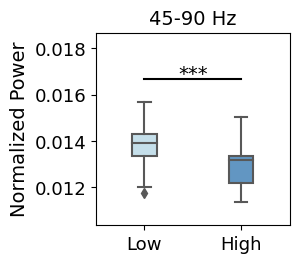

In [33]:
bandwise_power_plots(low_bs_list_tot,hi_bs_list_tot,0.001,[0.001,0.003],'45-90 Hz')
#plt.savefig('45_90_all_sessions_bs_hi_vs_low.svg',bbox_inches='tight',dpi=1200)

## Baseline vs stim 

In [204]:
f1 = h5py.File("high_low_speed_periods_10Hz_zscore.h5",'r+')
high_speed_baseline = np.array(f1['hi_speed_bs'])
low_speed_baseline = np.array(f1['low_speed_bs'])
high_speed_stim = np.array(f1['hi_speed_stim'])
low_speed_stim = np.array(f1['low_speed_stim'])
frequencies =np.array(f1['frequencies'])
f1.close()

high_speed_baseline =np.delete(high_speed_baseline,10,1)
low_speed_baseline =np.delete(low_speed_baseline,10,1)
high_speed_stim =np.delete(high_speed_stim,10,1)
low_speed_stim =np.delete(low_speed_stim,10,1)

In [205]:
f1 = h5py.File("high_low_speed_periods_145Hz_zscore.h5",'r+')
high_speed_baseline2 = np.array(f1['hi_speed_bs'])
low_speed_baseline2 = np.array(f1['low_speed_bs'])
high_speed_stim2 = np.array(f1['hi_speed_stim'])
low_speed_stim2 = np.array(f1['low_speed_stim'])
frequencies2 =np.array(f1['frequencies'])
f1.close()

high_speed_baseline2 =np.delete(high_speed_baseline2,11,1)
low_speed_baseline2 =np.delete(low_speed_baseline2,11,1)
high_speed_stim2 =np.delete(high_speed_stim2,11,1)
low_speed_stim2 =np.delete(low_speed_stim2,11,1)

In [206]:
high_speed_baseline_tot=np.concatenate((high_speed_baseline,high_speed_baseline2[0:63,:]),axis=1)
low_speed_baseline_tot=np.concatenate((low_speed_baseline,low_speed_baseline2[0:63,:]),axis=1)
high_speed_stim_tot=np.concatenate((high_speed_stim,high_speed_stim2),axis=1)
low_speed_stim_tot=np.concatenate((low_speed_stim,low_speed_stim2),axis=1)

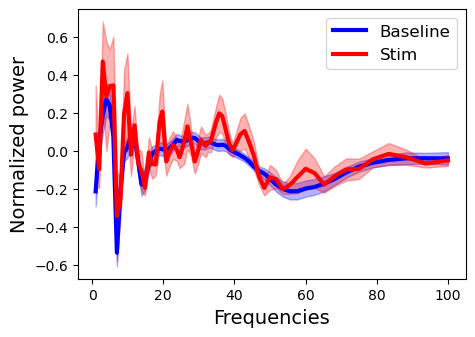

In [207]:
freq=frequencies
l_mean= np.nanmean((low_speed_baseline),axis=1)
l_std = np.nanstd((low_speed_baseline),axis=1)
h_mean= np.nanmean((low_speed_stim),axis=1)
h_std = np.nanstd((low_speed_stim),axis=1)
h_std=h_std/np.sqrt(low_speed_stim.shape[1])
l_std=l_std/np.sqrt(low_speed_baseline.shape[1])
fig,ax = plt.subplots(1,1,figsize=(5,3.5))
ax.plot(freq,l_mean,color ='blue', label='Baseline',linewidth=3.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='blue',alpha=0.3)
ax.plot(freq,h_mean,color ='red', label='Stim',linewidth=3.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='red',alpha=0.3)
#ax.set_xlim(0,20)
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=12)
plt.savefig('mean_low_stim_vs_baseline_10Hz.svg',dpi=1200,bbox_inches='tight')

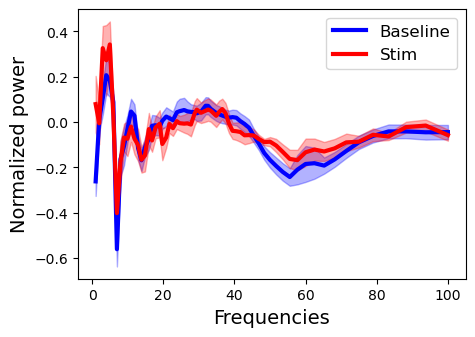

In [39]:
freq=frequencies
l_mean= np.nanmean((low_speed_baseline2),axis=1)
l_std = np.nanstd((low_speed_baseline2),axis=1)
h_mean= np.nanmean((low_speed_stim2),axis=1)
h_std = np.nanstd((low_speed_stim2),axis=1)
h_std=h_std/np.sqrt(low_speed_stim2.shape[1])
l_std=l_std/np.sqrt(low_speed_baseline2.shape[1])
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
ax.plot(freq,l_mean,color ='blue', label='Baseline',linewidth=3.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='blue',alpha=0.3)
ax.plot(freq,h_mean,color ='red', label='Stim',linewidth=3.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='red',alpha=0.3)
#ax.set_xlim(0,20)
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=12)
#plt.savefig('mean_low_stim_vs_baseline_145Hz.svg',dpi=1200,bbox_inches='tight')

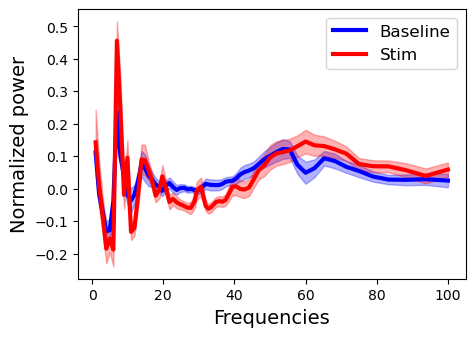

In [40]:
freq=frequencies
l_mean= np.nanmean((high_speed_baseline),axis=1)
l_std = np.nanstd((high_speed_baseline),axis=1)
h_mean= np.nanmean((high_speed_stim),axis=1)
h_std = np.nanstd((high_speed_stim),axis=1)
h_std=h_std/np.sqrt(high_speed_stim.shape[1])
l_std=l_std/np.sqrt(high_speed_baseline.shape[1])
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
ax.plot(freq,l_mean,color ='blue', label='Baseline',linewidth=3.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='blue',alpha=0.3)
ax.plot(freq,h_mean,color ='red', label='Stim',linewidth=3.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='red',alpha=0.3)
#ax.set_xlim(15,60)
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=12)
#plt.savefig('mean_hi_stim_vs_baseline_10Hz_zscore.svg',dpi=1200,bbox_inches='tight')

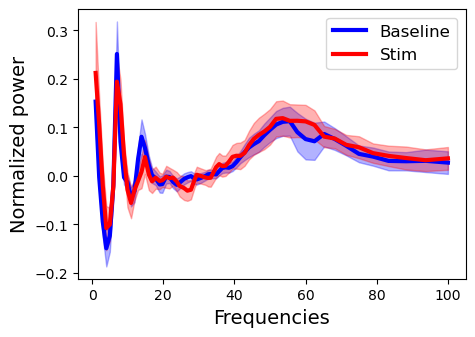

In [41]:
freq=frequencies
l_mean= np.nanmean((high_speed_baseline2),axis=1)
l_std = np.nanstd((high_speed_baseline2),axis=1)
h_mean= np.nanmean((high_speed_stim2),axis=1)
h_std = np.nanstd((high_speed_stim2),axis=1)
h_std=h_std/np.sqrt(high_speed_stim2.shape[1])
l_std=l_std/np.sqrt(high_speed_baseline2.shape[1])
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
ax.plot(freq,l_mean,color ='blue', label='Baseline',linewidth=3.0)
ax.fill_between(freq, l_mean-l_std, l_mean+l_std,color='blue',alpha=0.3)
ax.plot(freq,h_mean,color ='red', label='Stim',linewidth=3.0)
ax.fill_between(freq, h_mean-h_std, h_mean+h_std,color='red',alpha=0.3)
#ax.set_xlim(15,60)
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Frequencies',fontsize=14)
ax.legend(loc='upper right',fontsize=12)
#plt.savefig('mean_hi_stim_vs_baseline_145Hz.svg',dpi=1200,bbox_inches='tight')

In [16]:
def get_power_values_band_wise(start_freq,stop_freq,f):
    if frequency==10:
        f1 = h5py.File("high_low_speed_periods_10Hz_zscore.h5",'r+')
    else:
        f1 = h5py.File("high_low_speed_periods_145Hz_zscore.h5",'r+')
    high_speed_baseline = np.array(f1['hi_speed_bs'])
    low_speed_baseline = np.array(f1['low_speed_bs'])
    high_speed_stim = np.array(f1['hi_speed_stim'])
    low_speed_stim = np.array(f1['low_speed_stim'])
    frequencies =np.array(f1['frequencies'])
    f1.close()
    if frequency==10:
        high_speed_baseline =np.delete(high_speed_baseline,10,1)
        low_speed_baseline =np.delete(low_speed_baseline,10,1)
    else:
        high_speed_baseline =np.delete(high_speed_baseline,11,1)
        low_speed_baseline =np.delete(low_speed_baseline,11,1)
    hi_bs_list=[]
    low_bs_list=[]
    hi_stim_list=[]
    low_stim_list=[]
    
    # Think of getting finer resolution!
    for i in np.arange(0,high_speed_baseline.shape[1],1):
        hi_bs = high_speed_baseline[:,i]
        low_bs = low_speed_baseline[:,i]
        hi_stim = high_speed_stim[:,i]
        low_stim = low_speed_stim[:,i]
        if f==10:
            hi_bs_power,low_bs_power,hi_stim_power,low_stim_power=power_comp_method_1(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim)
        else:
            hi_bs_power,low_bs_power,hi_stim_power,low_stim_power=power_comp_method_2(start_freq,stop_freq,hi_bs,low_bs,hi_stim,low_stim)
        hi_bs_list.append(hi_bs_power)
        low_bs_list.append(low_bs_power)
        hi_stim_list.append(hi_stim_power)
        low_stim_list.append(low_stim_power)

    return low_bs_list,hi_bs_list,low_stim_list,hi_stim_list

In [23]:
start_freq=15
stop_freq=30
frequency=10

low_bs_list,hi_bs_list,low_stim_list,hi_stim_list=get_power_values_band_wise(start_freq,stop_freq,frequency)

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_15520\3740639250.py:10: RuntimeWarning: Mean of empty slice
  low_stim_power=np.nanmean(low_stim[start_index:end_index+1])


In [24]:
def bandwise_power_plots_stim(low_bs_list_tot,hi_bs_list_tot,sig_bar,space,T):
    data={'Baseline':low_bs_list_tot,'Stim':hi_bs_list_tot}
    idx=np.squeeze(np.argwhere(np.isnan(low_bs_list_tot)))
    idx2=np.squeeze(np.argwhere(np.isnan(hi_bs_list_tot)))
    if np.size(idx)>1 or np.size(idx2)>1:
        idx=np.union1d(idx,idx2)     
    df=pd.DataFrame(data)
    if np.size(idx)==0:
        df=df
    if np.size(idx)==1:
        df=df.drop([idx])
    if np.size(idx)>1:
        df=df.drop(idx)
        
    plt.figure(figsize=(2.5,2.5))
    my_pal = {"Baseline": "#0C9FC3", "Stim": "#C50632"}
    ax=sns.boxplot(data=df,palette=my_pal,width=0.25)
    ax.set_title(T,fontsize=14)
    ax.set_ylabel('Normalized Power',fontsize=14)
    x=[np.zeros(len(hi_bs_list_tot)-np.size(idx)),np.ones(len(hi_bs_list_tot)-np.size(idx))]
    y=[df['Baseline'],df['Stim']]
    #ax.scatter(x,y,color='k',alpha=0.2)
    #ax.plot(x,y,color='k',alpha=0.2)
    y_max=max(max(df['Baseline']),max(df['Stim']))
    y_min=min(min(df['Baseline']),min(df['Stim']))
    print(ss.wilcoxon(df['Baseline'],df['Stim']))
    print(ss.ttest_rel(df['Baseline'],df['Stim']))
    if ss.wilcoxon(df['Baseline'],df['Stim'])[1]<0.05 or ss.ttest_rel(df['Baseline'],df['Stim'])[1]<0.05:
            ax.plot([0,1],[y_max+sig_bar,y_max+sig_bar], 'k')
            if ss.wilcoxon(df['Baseline'],df['Stim'])[1]>0.01 or ss.ttest_rel(df['Baseline'],df['Stim'])[1]>0.01:
                ax.text(0.5,y_max+sig_bar, '*', horizontalalignment='center', fontsize=14)
            if ss.wilcoxon(df['Baseline'],df['Stim'])[1]>0.001 and ss.wilcoxon(df['Baseline'],df['Stim'])[1]<0.01:
                ax.text(0.5,y_max+sig_bar, '**', horizontalalignment='center', fontsize=14)
            if ss.wilcoxon(df['Baseline'],df['Stim'])[1]<0.001:
                ax.text(0.5,y_max+sig_bar, '***', horizontalalignment='center', fontsize=14)
    ax.set_ylim([y_min-space[0],y_max+space[1]])
    ax.tick_params(axis='both', which='major', labelsize=12)
    return idx

WilcoxonResult(statistic=12.0, pvalue=0.0341796875)
TtestResult(statistic=2.309466000714078, pvalue=0.04133754270251687, df=11)


array([], dtype=int64)

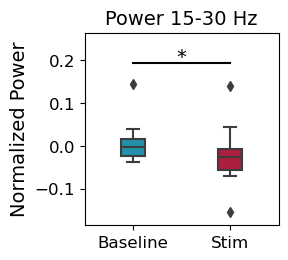

In [25]:
bandwise_power_plots_stim(hi_bs_list,hi_stim_list,0.05,[0.03,0.12],'Power 15-30 Hz')
#plt.savefig('15_to_30Hz_sessions_hi_bs_vs_stim_10Hz_zscore.svg',bbox_inches='tight',dpi=1200)

In [26]:
def hilbert_power_stim_onset(file_number,lowcut,highcut,time_before_after):
    
    LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_number])
    outlier_points= artifact_points(LFP)[0]
    x=LFP
    dt=0.001

    N = LFP.shape[0]
    a= np.arange(0,N,1)
    fs = 1000
    

    filtered_LFP=butter_bandpass_filter2(LFP, lowcut, highcut, fs, order=5)
    # Hilbert transform
    analytical_signal = hilbert(filtered_LFP)
    # Power 
    amplitude_envelope = np.abs(analytical_signal)   
    
    file=motion_Files[file_number]
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    t=a[0:3*time_before_after+1]
    coeff_matrix=np.zeros((5,t.shape[0]))
    outlier_points= artifact_points(LFP)[0]

    for i in np.arange(0,5,1):
        coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
        coeff_matrix[i,:]=coeff_chunk  
        
    for i in np.arange(0,5,1):
        idx=np.arange(int(shifted_onset_df.loc[i,:]-time_before_after),int(shifted_onset_df.loc[i,:]+time_before_after+1),1)
        outliers=np.squeeze(np.array(np.where(np.in1d(idx,outlier_points))))
        coeff_matrix[i,outliers]=np.NaN
        
    return sess_name,coeff_matrix

In [27]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass2(lowcut, highcut, fs, order):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter2(data, lowcut, highcut, fs, order):
        sos = butter_bandpass2(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [27]:
time_before_after=60000
tot_wind= 3*time_before_after+1
coeff=np.zeros((5,40,tot_wind))
file_no=5
freq_res=0.5
freq=[]
for i in np.arange(1,41,1):
    _,coeff_matrix,_=hilbert_power_stim_onset(file_no,i*freq_res,i*freq_res+freq_res,time_before_after)
    freq.append((i*freq_res+(i+1)*freq_res)/2)
    coeff[:,i-1,:]=coeff_matrix

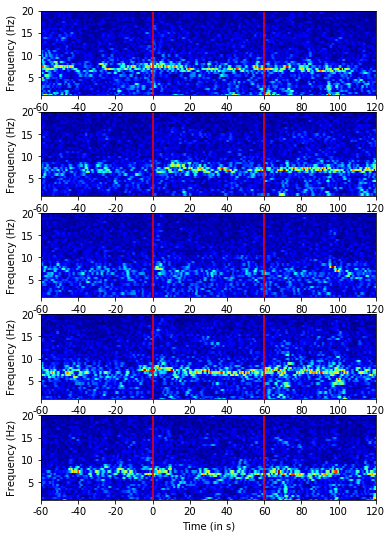

In [28]:
fig, ax = plt.subplots(5,1,figsize=(6,9))
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
for i in np.arange(0,5,1):
#grand_mean2 = np.ma.masked_invalid(np.atleast_2d(grand_mean))
    im=ax[i].pcolormesh(t,freq,coeff[i,:,:],cmap='jet')
    ax[i].set_ylim([1,20])
    ax[i].axvline(x=60001,color='r')
    ax[i].axvline(x=120001,color='r')
    ax[i].set_xticks(np.arange(0,180001,20000))
    ax[i].set_xticklabels(np.arange(-60,121,20)) 
    ax[i].set_xlabel('Time (in s)')
    ax[i].set_ylabel('Frequency (Hz)')

In [35]:
## Make a df to exclude certain sessions and trials 
# 0 indicates no trials to be removed and NaN indicates throw out the sessions 
data=[0,0,0,0,0,0,0,0,0,0,0,0,0]
exclusion_df_10Hz_2 = pd.DataFrame(data)
exclusion_df_10Hz_2 .index=sess_list_10Hz
exclusion_df_10Hz_2 .columns=['excl_trials']
exclusion_df_10Hz_2 

,excl_trials
608451_01062020,0
608452_01062020,0
608450_03092020,0
611311_03092020,0
602101_03092020,0
608448_01172020,0
608451_07082020,0
608452_07082020,0
611111_07082020,0
602101_07082020,0


In [23]:
## Running across sessions 
time_before_after=60000
tot_wind= 3*time_before_after+1
freq_res=0.2

coeff=np.zeros((5,80,tot_wind))
freq=[]
for j in np.arange(1,81,1):
    sess_name,coeff_matrix=hilbert_power_stim_onset(0,j*freq_res,(j+1)*freq_res,time_before_after)
    freq.append((j*freq_res+(j+1)*freq_res)/2)
    coeff[:,j-1,:]=coeff_matrix

for file_no in np.arange(1,len(Files),1):
    file=motion_Files[file_no]
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    if exclusion_df_10Hz_2.loc[sess_name][0]==0:
        trial_list=[0,1,2,3,4]
    else:
        a=np.arange(0,5,1)
        b=exclusion_df_10Hz_2.loc[sess_name][0]
        trial_list=np.setdiff1d(a,b)
    b=np.zeros((len(trial_list),80,tot_wind))
    for j in np.arange(1,81,1):
        sess_name,coeff_matrix=hilbert_power_stim_onset(file_no,j*freq_res,(j+1)*freq_res,time_before_after)
        b[:,j-1,:]=coeff_matrix[trial_list,:]
    coeff=np.concatenate((coeff,b))

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_d

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_d

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_4252\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_d

KeyboardInterrupt: 

In [ ]:
#z score
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
    

In [28]:
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [29]:
f=h5py.File('hilbert_10Hz_2_res_final.h5', "w")
dset1 = f.create_dataset('spect', data=mean_stim)
dset1 = f.create_dataset('freq', data=freq)
dset1 = f.create_dataset('normalized stim value', data=power_comp_method_1)
f.close()

In [29]:
f=h5py.File('hilbert_10Hz_2_res_final.h5', "r")
mean_stim= np.array(f['spect'])
freq =np.array(f['freq'])
normalized_stim_value=np.array(f['normalized stim value'])
f.close()

In [30]:
mean_stim.shape

(80, 180001)

In [31]:
idx=np.argwhere(np.array(freq)>9.8)[0]
idx2=np.argwhere(np.array(freq)>10.2)[0]
freq=np.array(freq)
freq[int(idx):int(idx2)]

array([ 9.9, 10.1])

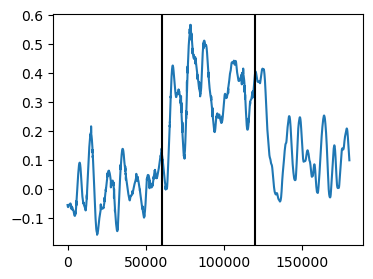

In [32]:
stim_power=mean_stim[int(idx):int(idx2),:]
stim_power_mean=np.nanmean(stim_power,axis=0)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(stim_power_mean)
ax.axvline(x=60001,color='k')
ax.axvline(x=120001,color='k')

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_15520\1153516678.py:2: RuntimeWarning: Mean of empty slice
  stim_power_mean=np.nanmean(stim_power_sess,axis=1)


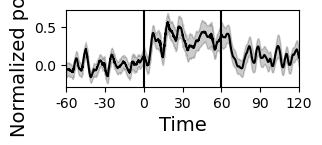

In [33]:
stim_power_sess=normalized_stim_value[:,int(idx):int(idx2),:]
stim_power_mean=np.nanmean(stim_power_sess,axis=1)
stim_power_mean2=np.nanmean(stim_power_mean,axis=0)
t_axis=np.arange(0,stim_power_mean2.shape[0],1)
stim_power_std=np.nanstd(stim_power_mean,axis=0)/np.sqrt(stim_power_mean.shape[0])



fig,ax=plt.subplots(1, 1,figsize=(3,1))
ax.plot(t_axis,stim_power_mean2,color ='k', label='Baseline',linewidth=1.5)
ax.fill_between(t_axis,stim_power_mean2-stim_power_std, stim_power_mean2+stim_power_std,color='k',alpha=0.2)
ax.axvline(x=60001,color='k')
ax.axvline(x=120001,color='k')
ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_xlim([0,180001])
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Time',fontsize=14)
#ax.legend(loc='upper right',fontsize=12)
#plt.savefig('mean_low_stim_vs_baseline_10Hz.svg',dpi=1200,bbox_inches='tight')
plt.savefig('10Hz_power_before_after_stim.png',dpi=1200,bbox_inches='tight')

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_27828\3827815884.py:2: RuntimeWarning: Mean of empty slice
  stim_power_mean=np.nanmean(stim_power_sess,axis=1)


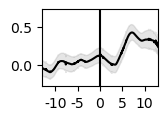

In [33]:
stim_power_sess=normalized_stim_value[:,int(idx):int(idx2),:]
stim_power_mean=np.nanmean(stim_power_sess,axis=1)
stim_power_mean2=np.nanmean(stim_power_mean,axis=0)
t_axis=np.arange(0,stim_power_mean2.shape[0],1)
stim_power_std=np.nanstd(stim_power_mean,axis=0)/np.sqrt(stim_power_mean.shape[0])
fig,ax=plt.subplots(1, 1,figsize=(1.5,1))
ax.plot(t_axis,stim_power_mean2,color='k',linewidth=1.5)
ax.fill_between(t_axis,stim_power_mean2-stim_power_std, stim_power_mean2+stim_power_std,color='gray',alpha=0.2)
ax.axvline(x=60001,color='k')
ax.axvline(x=120001,color='k')
ax.set_xticks(np.arange(0,180001,5000))
ax.set_xticklabels(np.arange(-60,121,5)) 
ax.set_xlim([60001-13000,60001+13000])
plt.savefig('10Hz_power_before_after_stim_onset.png',dpi=1200,bbox_inches='tight')

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_27828\3900117478.py:2: RuntimeWarning: Mean of empty slice
  stim_power_mean=np.nanmean(stim_power_sess,axis=1)


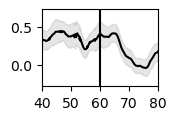

In [32]:
stim_power_sess=normalized_stim_value[:,int(idx):int(idx2),:]
stim_power_mean=np.nanmean(stim_power_sess,axis=1)
stim_power_mean2=np.nanmean(stim_power_mean,axis=0)
t_axis=np.arange(0,stim_power_mean2.shape[0],1)
stim_power_std=np.nanstd(stim_power_mean,axis=0)/np.sqrt(stim_power_mean.shape[0])
fig,ax=plt.subplots(1, 1,figsize=(1.5,1))
ax.plot(t_axis,stim_power_mean2,color='k',linewidth=1.5)
ax.fill_between(t_axis,stim_power_mean2-stim_power_std, stim_power_mean2+stim_power_std,color='gray',alpha=0.2)
ax.axvline(x=60001,color='k')
ax.axvline(x=120001,color='k')
ax.set_xticks(np.arange(0,180001,10000))
ax.set_xticklabels(np.arange(-60,121,10)) 
ax.set_xlim([120001-20001,120001+20000])
plt.savefig('10Hz_power_before_after_stim_offset.png',dpi=1200,bbox_inches='tight')

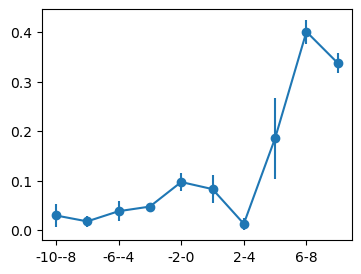

In [219]:
mean_power_list=[]
std_power_list=[]
for j in np.arange(0,10,1):
    #print(j)
    mean_power_list.append(np.nanmean(stim_power_mean_onset[j*2000:(j+1)*2000]))
    std_power_list.append(np.nanstd(stim_power_mean_onset[j*2000:(j+1)*2000]))
mean_power_list 
fig,ax=plt.subplots(1, 1,figsize=(4,3))
plt.scatter(np.arange(0,10,1),mean_power_list)
plt.errorbar(np.arange(0,10,1),mean_power_list,yerr=std_power_list)
plt.xticks(np.arange(0,10,2),labels=['-10--8','-6--4','-2-0','2-4','6-8'])
plt.savefig('10Hz_power_before_after_stim_onset_mean_avg.svg',dpi=1200,bbox_inches='tight')

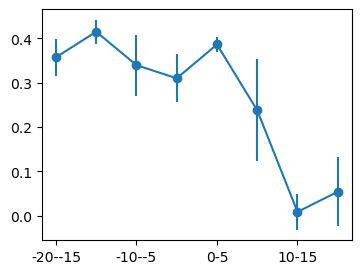

In [218]:
stim_power_mean_offset=stim_power_mean2[120001-20000:120001+20000]
mean_power_list=[]
std_power_list=[]
for j in np.arange(0,8,1):
    #print(j)
    mean_power_list.append(np.nanmean(stim_power_mean_offset[j*5000:(j+1)*5000]))
    std_power_list.append(np.nanstd(stim_power_mean_offset[j*5000:(j+1)*5000]))
mean_power_list 
fig,ax=plt.subplots(1, 1,figsize=(4,3))
plt.scatter(np.arange(0,8,1),mean_power_list)
#plt.errorbar(np.arange(0,10,1),std_power_list)
plt.errorbar(np.arange(0,8,1),mean_power_list,yerr=std_power_list)
plt.xticks(np.arange(0,8,2),labels=['-20--15','-10--5','0-5','10-15'])
plt.savefig('10Hz_power_before_after_stim_offset_mean_Avg.svg',dpi=1200,bbox_inches='tight')

In [107]:
f=h5py.File('hilbert_10Hz_2_res_final.h5', "r")
mean_stim = np.array(f['spect'])
freq = np.array(f['freq'])
f.close()

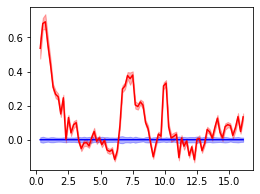

In [129]:
pre=mean_stim[:,0:60000]
post=mean_stim[:,60000:120000]
pre_mean=pre.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.3)
ax.plot(freq,post_mean,color='r')
ax.fill_between(freq, post_mean-std2, post_mean+std2,color='r',alpha=0.3)
plt.savefig('pre_post_PSD_1_16Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

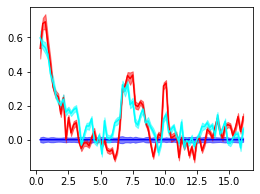

In [131]:
pre=mean_stim[:,0:60000]
during=mean_stim[:,60000:120000]
post=mean_stim[:,120000:180000]
pre_mean=pre.mean(axis=1)
during_mean=during.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(during,axis=1)/np.sqrt(65)
std3=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.5)
ax.plot(freq,during_mean,color='r')
ax.fill_between(freq, during_mean-std2, during_mean+std2,color='r',alpha=0.5)
ax.plot(freq,post_mean,color='cyan')
ax.fill_between(freq, post_mean-std3, post_mean+std3,color='cyan',alpha=0.5)
plt.savefig('pre_during_post_PSD_1_16Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

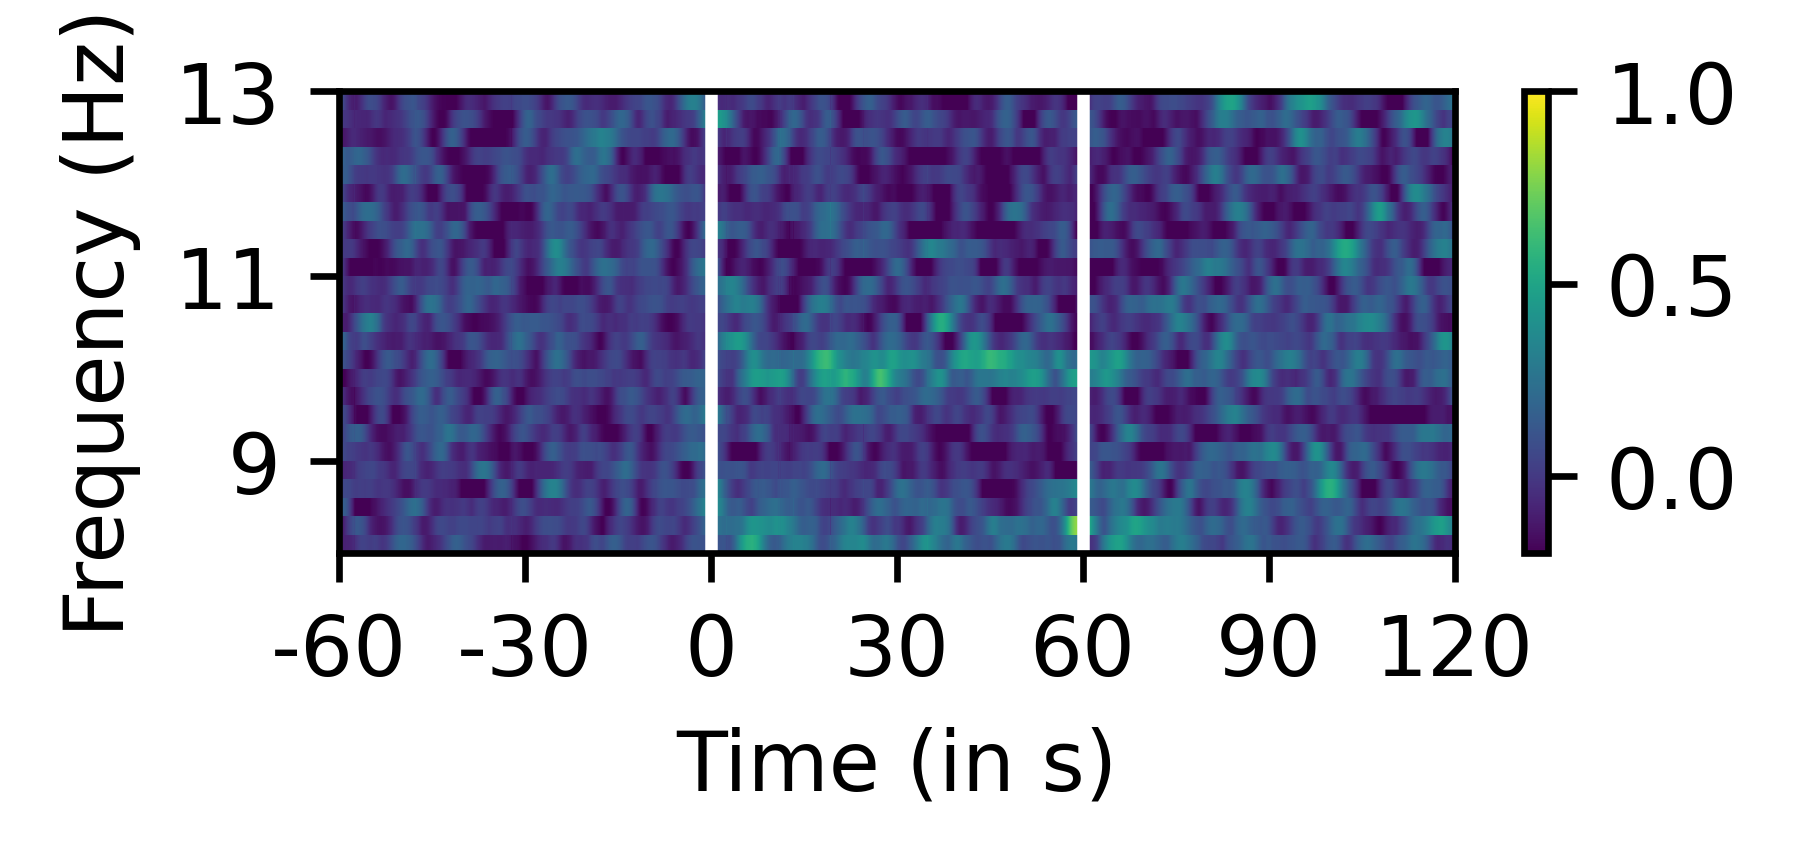

In [37]:
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
fig, ax = plt.subplots(1,1,figsize=(3,1),dpi=600)
im=ax.pcolormesh(t,freq,mean_stim,cmap='viridis',vmin=-0.2,vmax=1)
cbar=fig.colorbar(im)
cbar.set_ticks([0,0.5,1])
#ax.set_ylim([1,25])
#ax.set_xlim([0,12001])
ax.axvline(x=60001,color='w')
ax.axvline(x=120001,color='w')
ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_ylim([8,13])
ax.set_yticks(np.arange(9,15,2))
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Frequency (Hz)')
#os.chdir( '/home/hanlabadmins/Codes_git/Stimulation-Project/Figures/Fig_5/')
plt.savefig('stim_before_after_hilbert_10Hz_2_res_8_13Hz.png',bbox_inches='tight')

In [ ]:
## Running across sessions 
time_before_after=60000
tot_wind= 3*time_before_after+1
freq_res=1

coeff=np.zeros((5,200,tot_wind))
freq=[]
for j in np.arange(1,201,1):
    sess_name,coeff_matrix=hilbert_power_stim_onset(0,j*freq_res,(j+1)*freq_res,time_before_after)
    freq.append((j*freq_res+(j+1)*freq_res)/2)
    coeff[:,j-1,:]=coeff_matrix

for file_no in np.arange(1,len(Files),1):
    file=motion_Files[file_no]
    sess_name= file.split('/')[6]+'_'+file.split('/')[7]
    if exclusion_df_10Hz_2.loc[sess_name][0]==0:
        trial_list=[0,1,2,3,4]
    else:
        a=np.arange(0,5,1)
        b=exclusion_df_10Hz_2.loc[sess_name][0]
        trial_list=np.setdiff1d(a,b)
    b=np.zeros((len(trial_list),200,tot_wind))
    for j in np.arange(1,201,1):
        sess_name,coeff_matrix=hilbert_power_stim_onset(file_no,j*freq_res,(j+1)*freq_res,time_before_after)
        b[:,j-1,:]=coeff_matrix[trial_list,:]
    coeff=np.concatenate((coeff,b))

In [ ]:
#z score
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [ ]:
f=h5py.File('hilbert_10Hz_1_res_1_200.h5', "w")
dset1 = f.create_dataset('spect', data=mean_stim)
dset1 = f.create_dataset('freq', data=freq)
f.close()

In [ ]:
#os.chdir( '/home/hanlabadmins/Codes_git/Stimulation-Project/Trace_analysis/Final_codes/')
f=h5py.File('hilbert_10Hz_1_res_1_200.h5', "r")
mean_stim = np.array(f['spect'])
freq = np.array(f['freq'])
f.close()

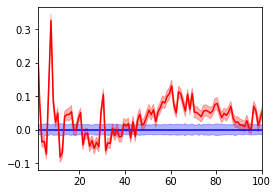

In [133]:
pre=mean_stim[:,0:60000]
post=mean_stim[:,60000:120000]
pre_mean=pre.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.3)
ax.plot(freq,post_mean,color='r')
ax.fill_between(freq, post_mean-std2, post_mean+std2,color='r',alpha=0.3)
ax.set_xlim([2,100])
plt.savefig('pre_post_PSD_1_100Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

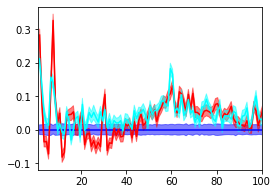

In [137]:
pre=mean_stim[:,0:60000]
during=mean_stim[:,60000:120000]
post=mean_stim[:,120000:180000]
pre_mean=pre.mean(axis=1)
during_mean=during.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(during,axis=1)/np.sqrt(65)
std3=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.5)
ax.plot(freq,during_mean,color='r')
ax.fill_between(freq, during_mean-std2, during_mean+std2,color='r',alpha=0.5)
ax.plot(freq,post_mean,color='cyan')
ax.fill_between(freq, post_mean-std3, post_mean+std3,color='cyan',alpha=0.5)
ax.set_xlim([1,100])
plt.savefig('pre_during_post_PSD_1_100Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

In [ ]:
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
fig, ax = plt.subplots(1,1,figsize=(3,2),dpi=600)
im=ax.pcolormesh(t,freq,mean_stim,cmap='viridis',vmin=-0.2,vmax=1)
cbar=fig.colorbar(im)
cbar.set_ticks([0,0.5,1])
#ax.set_ylim([1,25])
#ax.set_xlim([0,12001])
ax.axvline(x=60001,color='w')
ax.axvline(x=120001,color='w')
ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_ylim([1,150])
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Frequency (Hz)')
os.chdir( '/home/hanlabadmins/Codes_git/Stimulation-Project/Figures/Fig_5/')
plt.savefig('stim_before_after_hilbert_10Hz_1_res_1_150Hz.png',bbox_inches='tight')

In [98]:
## Running across sessions 

time_before_after=60000
tot_wind= 3*time_before_after+1
freq_res=0.5

coeff=np.zeros((5,400,tot_wind))
freq=[]
for j in np.arange(1,401,1):
    sess_name,coeff_matrix=hilbert_power_stim_onset(0,j*freq_res,(j+1)*freq_res,time_before_after)
    freq.append((j*freq_res+(j+1)*freq_res)/2)
    coeff[:,j-1,:]=coeff_matrix

for file_no in np.arange(1,len(Files),1):
    file=motion_Files[file_no]
    sess_name= file.split('/')[6]+'_'+file.split('/')[7]
    if exclusion_df_10Hz_2.loc[sess_name][0]==0:
        trial_list=[0,1,2,3,4]
    else:
        a=np.arange(0,5,1)
        b=exclusion_df_10Hz_2.loc[sess_name][0]
        trial_list=np.setdiff1d(a,b)
    b=np.zeros((len(trial_list),400,tot_wind))
    for j in np.arange(1,401,1):
        sess_name,coeff_matrix=hilbert_power_stim_onset(file_no,j*freq_res,(j+1)*freq_res,time_before_after)
        b[:,j-1,:]=coeff_matrix[trial_list,:]
    coeff=np.concatenate((coeff,b))

In [ ]:
#z score
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [ ]:
f=h5py.File('hilbert_10Hz_05_res_1_200_2.h5', "w")
dset1 = f.create_dataset('matrix', data=normalized_stim_value)
dset1 = f.create_dataset('spect', data=mean_stim)
dset1 = f.create_dataset('freq', data=freq)
f.close()

In [ ]:
f=h5py.File('hilbert_10Hz_05_res_1_200.h5', "r")
coeff=np.array(f['matrix'])
coeff.shape

In [ ]:
#z score
time_before_after=60000
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [ ]:
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
fig, ax = plt.subplots(1,1,figsize=(3,2),dpi=600)
im=ax.pcolormesh(t,freq,mean_stim,cmap='viridis',vmin=-0.2,vmax=1)
c=fig.colorbar(im)
c.remove()
#ax.set_ylim([1,25])
#ax.set_xlim([0,12001])
ax.axvline(x=60001,color='w')
ax.axvline(x=120001,color='w')
ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_ylim([1,150])
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Frequency (Hz)')
#os.chdir( '/home/hanlabadmins/Codes_git/Stimulation-Project/Figures/Fig_5/')
#plt.savefig('stim_before_after_hilbert_10Hz_1_res_1_150Hz.png',bbox_inches='tight')

In [ ]:
pre=mean_stim[:,0:60000]
post=mean_stim[:,60000:120000]
pre_mean=pre.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.3)
ax.plot(freq,post_mean,color='r')
ax.fill_between(freq, post_mean-std2, post_mean+std2,color='r',alpha=0.3)
ax.set_xlim([2,100])
plt.savefig('pre_post_PSD_1_100Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

In [ ]:
pre=mean_stim[:,0:60000]
during=mean_stim[:,60000:120000]
post=mean_stim[:,120000:180000]
pre_mean=pre.mean(axis=1)
during_mean=during.mean(axis=1)
post_mean=post.mean(axis=1)
std=np.std(pre,axis=1)/np.sqrt(65)
std2=np.std(during,axis=1)/np.sqrt(65)
std3=np.std(post,axis=1)/np.sqrt(65)
fig,ax=plt.subplots(1, 1,figsize=(4,3))
ax.plot(freq,pre_mean,color='b')
ax.fill_between(freq, pre_mean-std, pre_mean+std,color='b',alpha=0.5)
ax.plot(freq,during_mean,color='r')
ax.fill_between(freq, during_mean-std2, during_mean+std2,color='r',alpha=0.5)
ax.plot(freq,post_mean,color='cyan')
ax.fill_between(freq, post_mean-std3, post_mean+std3,color='cyan',alpha=0.5)
ax.set_xlim([1,100])
plt.savefig('pre_during_post_PSD_1_100Hz_10Hz.svg',dpi=1200,bbox_inches='tight')

In [61]:
def entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no):
    file=motion_Files[file_no]
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    if exclusion_df_10Hz_2.loc[sess_name][0]==0:
        trial_list=[0,1,2,3,4]
    else:
        a=np.arange(0,5,1)
        b=exclusion_df_10Hz_2.loc[sess_name][0]
        trial_list=np.setdiff1d(a,b)
    
    LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_no])
    x=LFP
    dt=0.001

    N = LFP.shape[0]
    a= np.arange(0,N,1)
    fs = 1000
    filtered_LFP=butter_bandpass_filter2(LFP, lowcut, highcut, fs, order=5)
    # Hilbert transform
    analytical_signal = hilbert(filtered_LFP)
    # Power 
    amplitude_envelope = np.abs(analytical_signal)   
    
    t=a[0:2*time_before_after+1]
    coeff_matrix=np.zeros((len(trial_list),t.shape[0]))
    outlier_points= artifact_points(LFP)[0]

    for i in np.arange(0,len(trial_list),1):
        coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
        coeff_matrix[i,:]=coeff_chunk

    for i in np.arange(0,len(trial_list),1):
        idx=np.arange(int(shifted_onset_df.loc[trial_list[i],:]-time_before_after),int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1),1)
        outliers=np.squeeze(np.array(np.where(np.in1d(idx,outlier_points))))
        coeff_matrix[i,outliers]=np.NaN

    
    post_onset=coeff_matrix[:,time_before_after:2*time_before_after]
    pre_onset=coeff_matrix[:,0:time_before_after]
    # Can also subtract this pre from whole power vector..
    pre=np.nanmean(pre_onset,axis=1)
    post=np.nanmean(post_onset,axis=1)
    return pre, post 

In [62]:
def entrainment_hilbert_power_offset(lowcut,highcut,time_before_after,file_no):
    file=motion_Files[file_no]
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    if exclusion_df_10Hz_2.loc[sess_name][0]==0:
        trial_list=[0,1,2,3,4]
    else:
        a=np.arange(0,5,1)
        b=exclusion_df_10Hz_2.loc[sess_name][0]
        trial_list=np.setdiff1d(a,b)
    
    LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_no])
    x=LFP
    dt=0.001

    N = LFP.shape[0]
    a= np.arange(0,N,1)
    fs = 1000
    filtered_LFP=butter_bandpass_filter2(LFP, lowcut, highcut, fs, order=5)
    # Hilbert transform
    analytical_signal = hilbert(filtered_LFP)
    # Power 
    amplitude_envelope = np.abs(analytical_signal)   
    
    t=a[0:2*time_before_after+1]
    coeff_matrix=np.zeros((len(trial_list),t.shape[0]))
    outlier_points= artifact_points(LFP)[0]

    for i in np.arange(0,len(trial_list),1):
        coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
        coeff_matrix[i,:]=coeff_chunk

    for i in np.arange(0,len(trial_list),1):
        idx=np.arange(int(shifted_offset_df.loc[trial_list[i],:]-time_before_after),int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1),1)
        outliers=np.squeeze(np.array(np.where(np.in1d(idx,outlier_points))))
        coeff_matrix[i,outliers]=np.NaN

    
    post_onset=coeff_matrix[:,time_before_after:2*time_before_after]
    pre_onset=coeff_matrix[:,0:time_before_after]
    # Can also subtract this pre from whole power vector..
    pre=np.nanmean(pre_onset,axis=1)
    post=np.nanmean(post_onset,axis=1)
    return pre, post 

In [178]:
lowcut=9.5
highcut=10.5
time_before_after=60000
file_no=1
entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)

(array([0.03140367, 0.02928119, 0.02419349, 0.02688168, 0.02392608]),
 array([0.03087484, 0.02811682, 0.02586877, 0.02548578, 0.02674048]))

In [21]:
lowcut=9.8
highcut=10.2
time_before_after=60000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_9880\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc

In [22]:
ss.wilcoxon(bs_list,stim_list)

WilcoxonResult(statistic=473.0, pvalue=8.940008128317563e-05)

In [23]:
ss.ttest_rel(bs_list,stim_list)

TtestResult(statistic=-4.420924707910255, pvalue=3.886444012879281e-05, df=64)

In [63]:
def bandwise_power_plots_stim(low_bs_list_tot,hi_bs_list_tot,sig_bar,space,T):
    data={'Baseline':low_bs_list_tot,'Stim':hi_bs_list_tot}
    df=pd.DataFrame(data)
    plt.figure(figsize=(1.5,2.0))
    my_pal = {"Baseline": "#0C9FC3", "Stim": "#C50632"}
    ax=sns.boxplot(data=df,palette=my_pal,width=0.25)
    ax.set_title(T,fontsize=14)
    ax.set_ylabel('Normalized Power',fontsize=14)
    x=[np.zeros(len(hi_bs_list_tot)),np.ones(len(hi_bs_list_tot))]
    y=[df['Baseline'],df['Stim']]
    #ax.scatter(x,y,color='k',alpha=0.2)
    #ax.plot(x,y,color='k',alpha=0.2)
    y_max=max(max(df['Baseline']),max(df['Stim']))
    y_min=min(min(df['Baseline']),min(df['Stim']))
    print(ss.ttest_rel(df['Baseline'],df['Stim']))
    if ss.ttest_rel(df['Baseline'],df['Stim'])[1]<0.05:
            ax.plot([0,1],[y_max+sig_bar,y_max+sig_bar], 'k')
            if ss.ttest_rel(df['Baseline'],df['Stim'])[1]>0.01:
                ax.text(0.5,y_max+sig_bar, '*', horizontalalignment='center', fontsize=14)
            if ss.ttest_rel(df['Baseline'],df['Stim'])[1]>0.001 and ss.ttest_rel(df['Baseline'],df['Stim'])[1]<0.01:
                ax.text(0.5,y_max+sig_bar, '**', horizontalalignment='center', fontsize=14)
            if ss.ttest_rel(df['Baseline'],df['Stim'])[1]<0.001:
                ax.text(0.5,y_max+sig_bar, '***', horizontalalignment='center', fontsize=14)
    ax.set_ylim([y_min-space[0],y_max+space[1]])
    ax.tick_params(axis='both', which='major', labelsize=12)

TtestResult(statistic=-4.420924707910255, pvalue=3.886444012879281e-05, df=64)


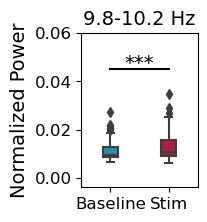

In [28]:
bandwise_power_plots_stim(bs_list,stim_list,0.01,[0.01,0.025],'9.8-10.2 Hz')
#os.chdir( '/home/hanlabadmins/Codes_git/Stimulation-Project/Figures/Fig_5/')
plt.savefig('60s_stim_period_10Hz_2.svg',dpi=1200,bbox_inches='tight')

In [29]:
f=h5py.File('Stim_LFP_power_10Hz.h5',"w")
dset1 = f.create_dataset('bs_power', data=bs_list)
dset1 = f.create_dataset('stim_power', data=stim_list)
f.close()

In [160]:
lowcut=9.8
highcut=10.2
time_before_after=10000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

WilcoxonResult(statistic=668.0, pvalue=0.008208248220903125) TtestResult(statistic=-2.8586733468875636, pvalue=0.005735484475578352, df=64)
TtestResult(statistic=-2.8586733468875636, pvalue=0.005735484475578352, df=64)


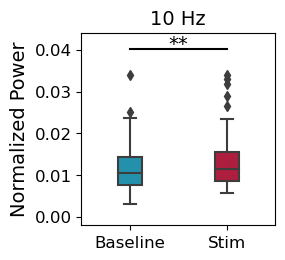

In [161]:
print(ss.wilcoxon(bs_list,stim_list),ss.ttest_rel(bs_list,stim_list))
bandwise_power_plots_stim(bs_list,stim_list,0.006,[0.005,0.01],'10 Hz')
plt.savefig('10s_stim_onset_10Hz.svg',dpi=1200,bbox_inches='tight')

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

WilcoxonResult(statistic=696.0, pvalue=0.013878095095503609) TtestResult(statistic=3.1843457166546836, pvalue=0.0022416650249307145, df=64)
TtestResult(statistic=3.1843457166546836, pvalue=0.0022416650249307145, df=64)


C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offset_df.loc[trial_list[i],:]-time_before_after):int(shifted_offset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_12960\3585342502.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_offse

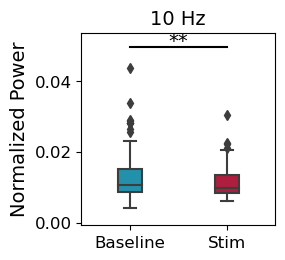

In [165]:
lowcut=9.8
highcut=10.2
time_before_after=20000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    file_no=i
    pre,post=entrainment_hilbert_power_offset(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()
print(ss.wilcoxon(bs_list,stim_list),ss.ttest_rel(bs_list,stim_list))
bandwise_power_plots_stim(bs_list,stim_list,0.006,[0.005,0.01],'10 Hz')
plt.savefig('20s_stim_offset_10Hz.svg',dpi=1200,bbox_inches='tight')

In [166]:
print(ss.wilcoxon(bs_list,stim_list),ss.ttest_rel(bs_list,stim_list))

WilcoxonResult(statistic=696.0, pvalue=0.013878095095503609) TtestResult(statistic=3.1843457166546836, pvalue=0.0022416650249307145, df=64)


In [1027]:
lowcut=19.8
highcut=20.2
time_before_after=60000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()

In [1028]:
ss.wilcoxon(bs_list,stim_list),ss.ttest_rel(bs_list,stim_list)

(WilcoxonResult(statistic=584.0, pvalue=0.0014113676094501411),
 Ttest_relResult(statistic=-3.3852533608945197, pvalue=0.0012191462529991392))

WilcoxonResult(statistic=584.0, pvalue=0.0014113676094501411)


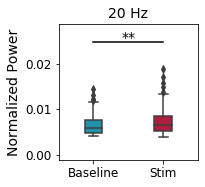

In [1029]:
bandwise_power_plots_stim(bs_list,stim_list,0.006,[0.005,0.01],'20 Hz')
plt.savefig('60s_stim_period_20Hz_hilbert_1min_2.svg',dpi=1200,bbox_inches='tight')

In [67]:
lowcut=144.5
highcut=145.5
time_before_after=60000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3323188273.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

In [68]:
ss.wilcoxon(bs_list,stim_list),ss.ttest_rel(bs_list,stim_list)

(WilcoxonResult(statistic=832.0, pvalue=0.11603126458621507),
 TtestResult(statistic=-1.8151936764864032, pvalue=0.07417993072536158, df=64))

TtestResult(statistic=-1.8151936764864032, pvalue=0.07417993072536158, df=64)


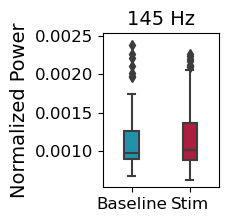

In [69]:
bandwise_power_plots_stim(bs_list,stim_list,0.008,[0.0001,0.00015],'145 Hz')
plt.savefig('60s_stim_period_145Hz_hilbert_1min_10Hz_sess.svg',dpi=1200,bbox_inches='tight')

# 145 Hz

In [35]:
def makeFilenames(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/{}_145Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'LFP_ts.h5'
    return directories, filenames

def makeFilenames_2(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/145Hz/{}_145Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'LFP_ts.h5'
    return directories, filenames

In [36]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [37]:
Base = "U:/eng_research_handata/eng_research_handata2/Sudi_Sridhar/"
Mice, Days = ([608448,608451,608452], ['01102020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files1 = combineFilenames(Base, Folders, Filenames)
#Combine All Filenames into one List
Mice, Days = ([611111,611311,602101], ['03112020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files2 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608450], ['01172020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files3 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608451,608452,611111], ['07012020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files4 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([612535,602101], ['07022020'])
Folders, Filenames = makeFilenames(Mice, Days)
Files5 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([615883], ['02052021','03122021'])
Folders, Filenames = makeFilenames_2(Mice, Days)
Files6 = combineFilenames(Base, Folders, Filenames)
Files= Files1+Files2+Files3+Files4+Files5+Files6

In [39]:
def makeFilenames_motion(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/{}_145Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'processed_motion.h5'
    return directories, filenames

def makeFilenames_motion_2(mouse_numbers, mouse_days):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            mouse_dir = '{}/{}/145Hz/{}_145Hz_AudioVisual/motion_corrected/'.format(m_num, m_day,m_num)
            directories.append(mouse_dir)
                #filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
            filenames[mouse_dir] = 'processed_motion.h5'
    return directories, filenames

In [40]:
Base = "U:/eng_research_handata/eng_research_handata2/Sudi_Sridhar/"
Mice, Days = ([608448,608451,608452], ['01102020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files1 = combineFilenames(Base, Folders, Filenames)
#Combine All Filenames into one List
Mice, Days = ([611111,611311,602101], ['03112020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files2 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608450], ['01172020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files3 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([608451,608452,611111], ['07012020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files4 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([612535,602101], ['07022020'])
Folders, Filenames = makeFilenames_motion(Mice, Days)
Files5 = combineFilenames(Base, Folders, Filenames)
Mice, Days = ([615883], ['02052021','03122021'])
Folders, Filenames = makeFilenames_motion_2(Mice, Days)
Files6 = combineFilenames(Base, Folders, Filenames)
motion_Files= Files1+Files2+Files3+Files4+Files5+Files6
motion_df=load_motion(motion_Files,'speed_trace')
moving_period_df=load_motion(motion_Files,'moving_period')
stationary_period_df=load_motion(motion_Files,'stationary_period')
motion_onsets_df=load_motion(motion_Files,'motion_onset_with')

In [41]:
sess_list_145Hz=[]
for i in np.arange(0,len(Files),1):
    file=Files[i]       
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    sess_list_145Hz.append(sess_name)

In [1284]:
#  combine across sessions ...
f=h5py.File('spect_all_periods_145Hz_2.h5', "w")
for file_number in np.arange(0,len(Files),1):
    sess_name,frequencies,coefficients=LFP_spect_all_periods(file_number)
    dset1 = f.create_dataset(sess_name, data=coefficients)
    print(list(f.keys()))
dset2 = f.create_dataset('frequency', data=frequencies)
f.close()

['608448_01102020']
['608448_01102020', '608451_01102020']
['608448_01102020', '608451_01102020', '608452_01102020']
['608448_01102020', '608451_01102020', '608452_01102020', '611111_03112020']
['608448_01102020', '608451_01102020', '608452_01102020', '611111_03112020', '611311_03112020']
['602101_03112020', '608448_01102020', '608451_01102020', '608452_01102020', '611111_03112020', '611311_03112020']
['602101_03112020', '608448_01102020', '608450_01172020', '608451_01102020', '608452_01102020', '611111_03112020', '611311_03112020']
['602101_03112020', '608448_01102020', '608450_01172020', '608451_01102020', '608451_07012020', '608452_01102020', '611111_03112020', '611311_03112020']
['602101_03112020', '608448_01102020', '608450_01172020', '608451_01102020', '608451_07012020', '608452_01102020', '608452_07012020', '611111_03112020', '611311_03112020']
['602101_03112020', '608448_01102020', '608450_01172020', '608451_01102020', '608451_07012020', '608452_01102020', '608452_07012020', '6

In [90]:
minS=15
maxS=5000
frequencies,sessH,sessL=get_hi_low_lfp_zscore(0,minS,maxS,145)

bs_speed_PSD= np.zeros((frequencies.shape[0],len(Files)))
stim_speed_PSD= np.zeros((frequencies.shape[0],len(Files)))
bs_speed_PSD[:,0]=np.squeeze(sessH)
stim_speed_PSD[:,0]=np.squeeze(sessL)

for i in np.arange(1,len(Files),1):
    print(i)
    _,sessH,sessL=get_hi_low_lfp_zscore(i,minS,maxS,145)
    bs_speed_PSD[:,i]=np.squeeze(sessH)
    stim_speed_PSD[:,i]=np.squeeze(sessL)

/home/hanlabadmins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/hanlabadmins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


1


/home/hanlabadmins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/home/hanlabadmins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


2
3
4
5
6
7
8
9
10
11
12
13


## Check for artifacts

In [44]:
time_before_after=60000
tot_wind= 3*time_before_after+1
coeff=np.zeros((5,20,tot_wind))
# 3,10,13
file_no=3
freq_res=0.5
freq=[]
for i in np.arange(1,21,1):
    sess_name,coeff_matrix=hilbert_power_stim_onset(file_no,140+i*freq_res,140+(i+1)*freq_res,time_before_after)
    freq.append((140+i*freq_res+140+(i+1)*freq_res)/2)
    coeff[:,i-1,:]=coeff_matrix

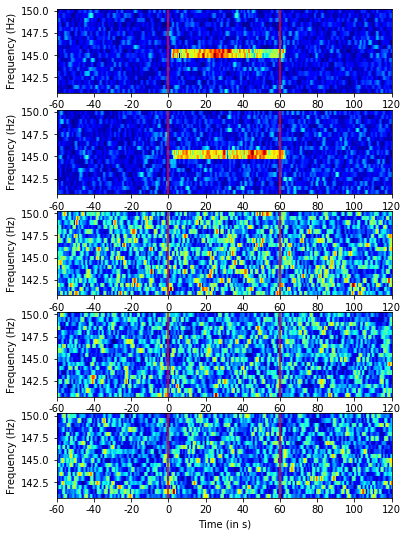

In [46]:
fig, ax = plt.subplots(5,1,figsize=(6,9))
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
for i in np.arange(0,5,1):
#grand_mean2 = np.ma.masked_invalid(np.atleast_2d(grand_mean))
    im=ax[i].pcolormesh(t,freq,coeff[i,:,:],cmap='jet')
    #ax[i].set_ylim([1,20])
    ax[i].axvline(x=60001,color='r')
    ax[i].axvline(x=120001,color='r')
    ax[i].set_xticks(np.arange(0,180001,20000))
    ax[i].set_xticklabels(np.arange(-60,121,20)) 
    ax[i].set_xlabel('Time (in s)')
    ax[i].set_ylabel('Frequency (Hz)')

In [42]:
sess_list_145Hz

['608448_01102020',
 '608451_01102020',
 '608452_01102020',
 '611111_03112020',
 '611311_03112020',
 '602101_03112020',
 '608450_01172020',
 '608451_07012020',
 '608452_07012020',
 '611111_07012020',
 '612535_07022020',
 '602101_07022020',
 '615883_02052021',
 '615883_03122021']

In [46]:
## Make a df to exclude certain sessions and trials 
# 0 indicates no trials to be removed and NaN indicates throw out the sessions 
data=list([0,0,0,np.NaN,[2,3,4],[0,1],np.NaN,np.NaN,[0,1],np.NaN,np.NaN,np.NaN,np.NaN,[0,1,3,4]])
exclusion_df_145Hz = pd.DataFrame(data)
exclusion_df_145Hz .index=sess_list_145Hz
exclusion_df_145Hz .columns=['excl_trials']
# Save in csv 
from pathlib import Path  
filepath = Path( "C:/Users/sudiksha/Documents/Codes/exlusion_df_145Hz.csv") 
filepath.parent.mkdir(parents=True, exist_ok=True)  
exclusion_df_145Hz .to_csv(filepath)  

In [47]:
exclusion_df_145Hz

,excl_trials
608448_01102020,0
608451_01102020,0
608452_01102020,0
611111_03112020,NaN
611311_03112020,"[2, 3, 4]"
602101_03112020,"[0, 1]"
608450_01172020,NaN
608451_07012020,NaN
608452_07012020,"[0, 1]"
611111_07012020,NaN


In [51]:
def entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no):
    file=motion_Files[file_no]
    sess_name= file.split('/')[4]+'_'+file.split('/')[5]
    
    if np.isnan(exclusion_df_145Hz.loc[sess_name][0]).all()==True:
        pre=np.NaN
        post=np.NaN
        trial_list=np.NaN
    else:
        if exclusion_df_145Hz.loc[sess_name][0]==0:
            trial_list=[0,1,2,3,4]
        else:
            a=np.arange(0,5,1)
            b=exclusion_df_145Hz.loc[sess_name][0]
            trial_list=np.setdiff1d(a,b)
    
        LFP,shifted_onset_df,shifted_offset_df,start_frame=load_LFP_data_2(Files[file_no])
        x=LFP
        dt=0.001

        N = LFP.shape[0]
        a= np.arange(0,N,1)
        fs = 1000
        filtered_LFP=butter_bandpass_filter2(LFP, lowcut, highcut, fs, order=5)
        # Hilbert transform
        analytical_signal = hilbert(filtered_LFP)
        # Power 
        amplitude_envelope = np.abs(analytical_signal)   
    
        t=a[0:2*time_before_after+1]
        coeff_matrix=np.zeros((len(trial_list),t.shape[0]))
        outlier_points= artifact_points(LFP)[0]

        for i in np.arange(0,len(trial_list),1):
            coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
            coeff_matrix[i,:]=coeff_chunk

        for i in np.arange(0,len(trial_list),1):
            idx=np.arange(int(shifted_onset_df.loc[trial_list[i],:]-time_before_after),int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1),1)
            outliers=np.squeeze(np.array(np.where(np.in1d(idx,outlier_points))))
            coeff_matrix[i,outliers]=np.NaN

    
        post_onset=coeff_matrix[:,time_before_after:2*time_before_after]
        pre_onset=coeff_matrix[:,0:time_before_after]
        # Can also subtract this pre from whole power vector..
        pre=np.nanmean(pre_onset,axis=1)
        post=np.nanmean(post_onset,axis=1)
    return pre, post 

In [36]:
lowcut=144
highcut=146
time_before_after=60000
bs_list=[]
stim_list=[]
for i in np.arange(0,len(Files),1):
    #print(i)
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list.append(pre)
    stim_list.append(post)

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:39: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  idx=np.arange(int(shifted_onset_df.loc[trial_list[i]

In [37]:
bs_list=[x for x in bs_list if x is not np.nan]
stim_list=[x for x in stim_list if x is not np.nan]
bs_list = np.concatenate(bs_list).ravel().tolist()
stim_list = np.concatenate(stim_list).ravel().tolist()

In [38]:
ss.wilcoxon(bs_list,stim_list)

WilcoxonResult(statistic=122.0, pvalue=0.4389305114746094)

In [39]:
ss.ttest_rel(bs_list,stim_list)

TtestResult(statistic=-0.6314618333845432, pvalue=0.5339647839457323, df=23)

In [40]:
len(bs_list)

24

WilcoxonResult(statistic=122.0, pvalue=0.4389305114746094)
TtestResult(statistic=-0.6314618333845432, pvalue=0.5339647839457323, df=23)


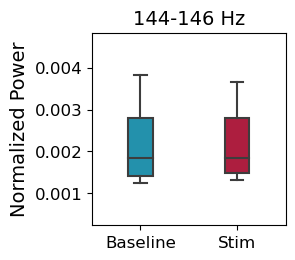

In [43]:
bandwise_power_plots_stim(bs_list,stim_list,0.001,[0.001,0.001],'144-146 Hz')
plt.savefig('145Hz_power_60s_stim.svg',dpi=1200,bbox_inches='tight')

In [44]:
f=h5py.File('Stim_LFP_power_145Hz.h5',"w")
dset1 = f.create_dataset('bs_power', data=bs_list)
dset1 = f.create_dataset('stim_power', data=stim_list)
f.close()

In [78]:
lowcut=9.5
highcut=10.5
time_before_after=60000
bs_list_145Hz=[]
stim_list_145Hz=[]
for i in np.arange(0,len(Files),1):
    #print(i)
    file_no=i
    pre,post=entrainment_hilbert_power(lowcut,highcut,time_before_after,file_no)
    bs_list_145Hz.append(pre)
    stim_list_145Hz.append(post)

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:35: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[trial_list[i],:]-time_before_after):int(shifted_onset_df.loc[trial_list[i],:]+time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\3765440269.py:39: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  idx=np.arange(int(shifted_onset_df.loc[trial_list[i]

In [79]:
bs_list_145Hz=[x for x in bs_list_145Hz if x is not np.nan]
stim_list_145Hz=[x for x in stim_list_145Hz if x is not np.nan]
bs_list_145Hz = np.concatenate(bs_list_145Hz).ravel().tolist()
stim_list_145Hz = np.concatenate(stim_list_145Hz).ravel().tolist()

In [80]:
ss.wilcoxon(bs_list_145Hz,stim_list_145Hz),ss.ttest_rel(bs_list_145Hz,stim_list_145Hz)

(WilcoxonResult(statistic=138.0, pvalue=0.746925950050354),
 TtestResult(statistic=-0.07772764561974638, pvalue=0.938716949371758, df=23))

TtestResult(statistic=-0.07772764561974638, pvalue=0.938716949371758, df=23)


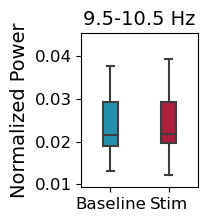

In [82]:
bandwise_power_plots_stim(bs_list_145Hz,stim_list_145Hz,0.003,[0.003,0.006],'9.5-10.5 Hz')
plt.savefig('145Hz_sess_10Hz_power_60s_stim.svg',dpi=1200,bbox_inches='tight')#

In [91]:
f=h5py.File('Stim_LFP_power_supp_figs.h5',"w")
dset1 = f.create_dataset('145_bs_power', data=bs_list)
dset1 = f.create_dataset('145_stim_power', data=stim_list)
dset1 = f.create_dataset('10_bs_power', data=bs_list_145Hz)
dset1 = f.create_dataset('10_stim_power', data=stim_list_145Hz)
dset1 = f.create_dataset('beta_bs', data=hi_bs_list)
dset1 = f.create_dataset('beta_stim', data=hi_stim_list)
f.close()

In [55]:
#z score
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
    

In [78]:
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [84]:
idx=np.argwhere(np.array(freq)>144.8)[0]
idx2=np.argwhere(np.array(freq)>145.2)[0]
freq=np.array(freq)
freq[int(idx):int(idx2)]

array([144.9, 145.1])

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_27828\1951893042.py:2: RuntimeWarning: Mean of empty slice
  stim_power_mean=np.nanmean(stim_power_sess,axis=1)


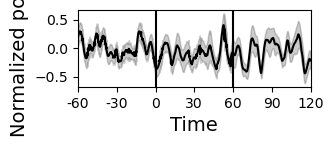

In [85]:
stim_power_sess=normalized_stim_value[:,int(idx):int(idx2),:]
stim_power_mean=np.nanmean(stim_power_sess,axis=1)
stim_power_mean2=np.nanmean(stim_power_mean,axis=0)
t_axis=np.arange(0,stim_power_mean2.shape[0],1)
stim_power_std=np.nanstd(stim_power_mean,axis=0)/np.sqrt(stim_power_mean.shape[0])



fig,ax=plt.subplots(1, 1,figsize=(3,1))
ax.plot(t_axis,stim_power_mean2,color ='k', label='Baseline',linewidth=1.5)
ax.fill_between(t_axis,stim_power_mean2-stim_power_std, stim_power_mean2+stim_power_std,color='k',alpha=0.2)
ax.axvline(x=60001,color='k')
ax.axvline(x=120001,color='k')
ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_xlim([0,180001])
ax.set_ylabel('Normalized power',fontsize=14)
ax.set_xlabel('Time',fontsize=14)
#ax.legend(loc='upper right',fontsize=12)
#plt.savefig('mean_low_stim_vs_baseline_10Hz.svg',dpi=1200,bbox_inches='tight')
plt.savefig('145Hz_power_before_after_stim.png',dpi=1200,bbox_inches='tight')

In [150]:
f=h5py.File('hilbert_145Hz_2_res_final.h5', "w")
dset1 = f.create_dataset('spect', data=mean_stim)
dset1 = f.create_dataset('freq', data=freq)
f.close()

In [45]:
f1=h5py.File('hilbert_145Hz_2_res_final.h5', "r")
mean_stim = np.array(f1['spect'])
freq = np.array(f1['freq'])
f1.close()

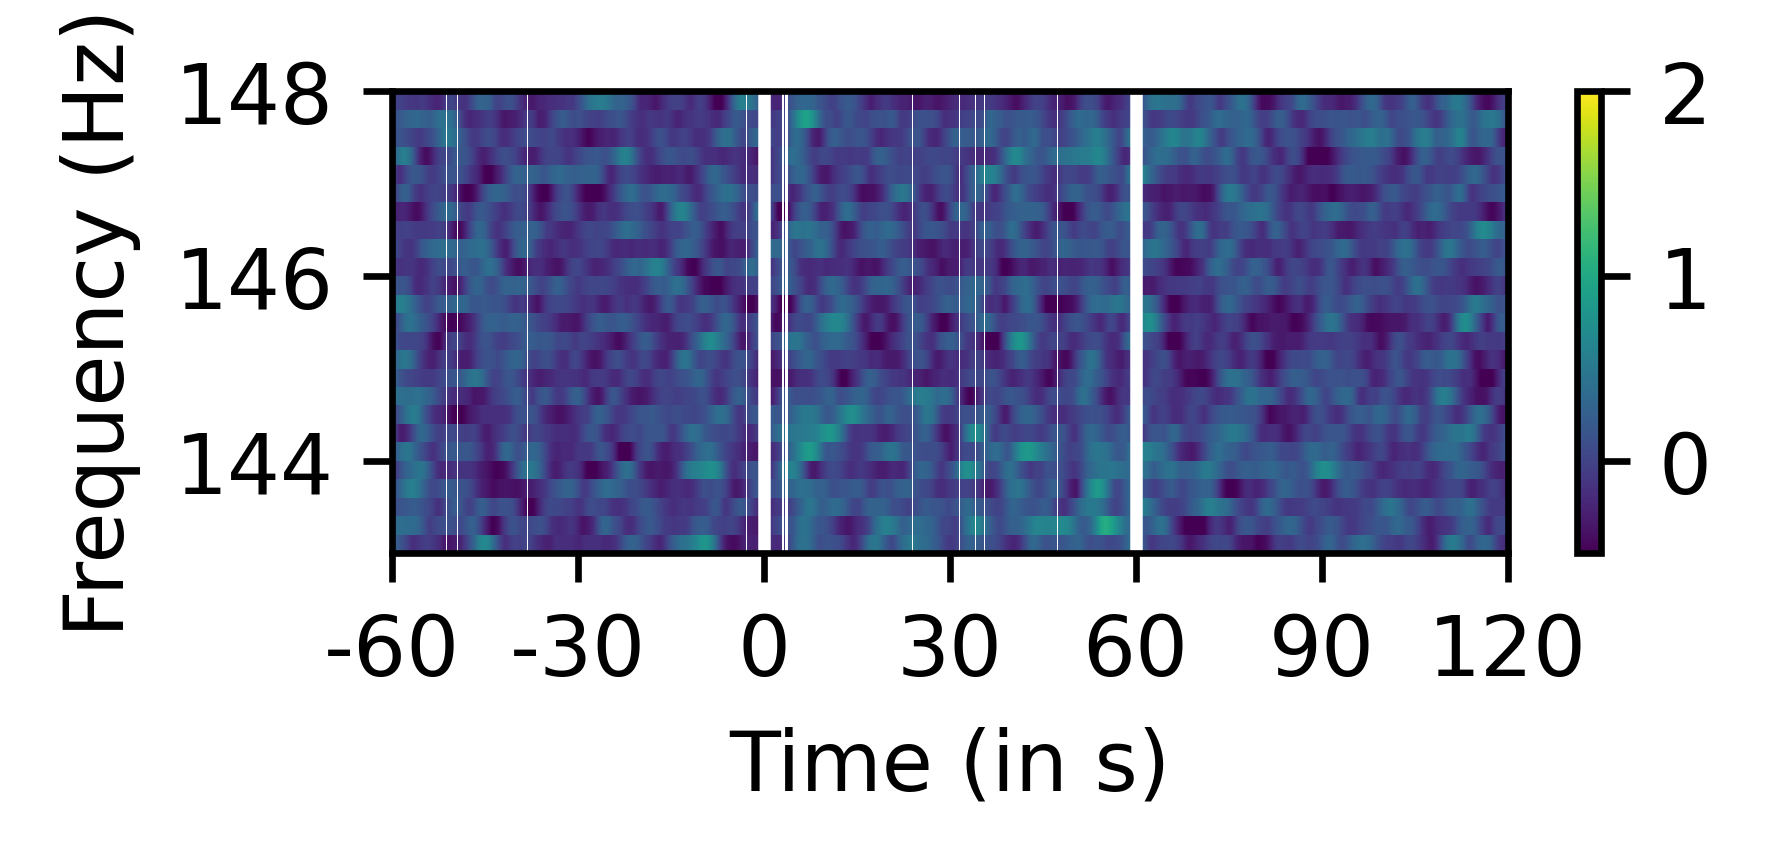

In [57]:
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
fig, ax = plt.subplots(1,1,figsize=(3,1),dpi=600)
im=ax.pcolormesh(t,freq,normalized_stim_value.mean(axis=0),cmap='viridis',vmin=-0.5,vmax=2)
cbar=fig.colorbar(im)
cbar.set_ticks([0,1,2])
ax.set_ylim([143,148])
ax.set_yticks(np.arange(144,150,2))
#ax.set_xlim([0,12001])
ax.axvline(x=60001,color='w')
ax.axvline(x=120001,color='w')

ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Frequency (Hz)')
plt.savefig('stim_before_after_hilbert_145Hz_zoom_2.png',dpi=1200,bbox_inches='tight')

In [129]:
time_before_after=60000
tot_wind= 3*time_before_after+1
freq_res=1

coeff=np.zeros((5,200,tot_wind))
freq=[]
for j in np.arange(1,201,1):
    sess_name,coeff_matrix=hilbert_power_stim_onset(0,j*freq_res,(j+1)*freq_res,time_before_after)
    freq.append((j*freq_res+(j+1)*freq_res)/2)
    coeff[:,j-1,:]=coeff_matrix

x=0
for file_no in np.arange(1,len(Files),1):
    file=motion_Files[file_no]
    sess_name= file.split('/')[6]+'_'+file.split('/')[7]
    if np.isnan(exclusion_df_145Hz.loc[sess_name][0]).all()==True:
            continue
    else:
        if exclusion_df_145Hz.loc[sess_name][0]==0:
            trial_list=[0,1,2,3,4]
        else:
            a=np.arange(0,5,1)
            b=exclusion_df_145Hz.loc[sess_name][0]
            trial_list=np.setdiff1d(a,b)
    b=np.zeros((len(trial_list),200,tot_wind))
    x=x+len(trial_list)
    for j in np.arange(1,201,1):
        sess_name,coeff_matrix=hilbert_power_stim_onset(file_no,j*freq_res,(j+1)*freq_res,time_before_after)
        b[:,j-1,:]=coeff_matrix[trial_list,:]
    coeff=np.concatenate((coeff,b))

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onset_df.loc[i,:]+2*time_before_after+1)]
C:\Users\sudiksha\AppData\Local\Temp\ipykernel_26856\1610105693.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  coeff_chunk=amplitude_envelope[int(shifted_onset_df.loc[i,:]-time_before_after):int(shifted_onse

KeyError: '608451_145Hz_AudioVisual_motion_corrected'

In [130]:
x+5

5

In [131]:
#z score
post_onset=coeff[:,:,:]
pre_onset=coeff[:,:,0:time_before_after]
pre_value=np.nanmean(pre_onset,axis=2)
pre_value=np.reshape(pre_value,(coeff.shape[0],coeff.shape[1],1))
pre_std= np.nanstd(pre_onset,axis=2)
pre_std=np.reshape(pre_std,(coeff.shape[0],coeff.shape[1],1))
        
normalized_stim_value=((post_onset-pre_value)/(pre_std))
mean_stim=np.nanmean(normalized_stim_value,axis=0)

In [132]:
f=h5py.File('hilbert_145Hz_1_res_0_200Hz_final.h5', "w")
dset1 = f.create_dataset('matrix', data=normalized_stim_value)
dset1 = f.create_dataset('spect', data=mean_stim)
dset1 = f.create_dataset('freq', data=freq)
f.close()

In [133]:
f1=h5py.File('hilbert_145Hz_1_res_0_200Hz_final.h5', "r")
mean_stim = np.array(f1['spect'])
freq = np.array(f1['freq'])
f1.close()

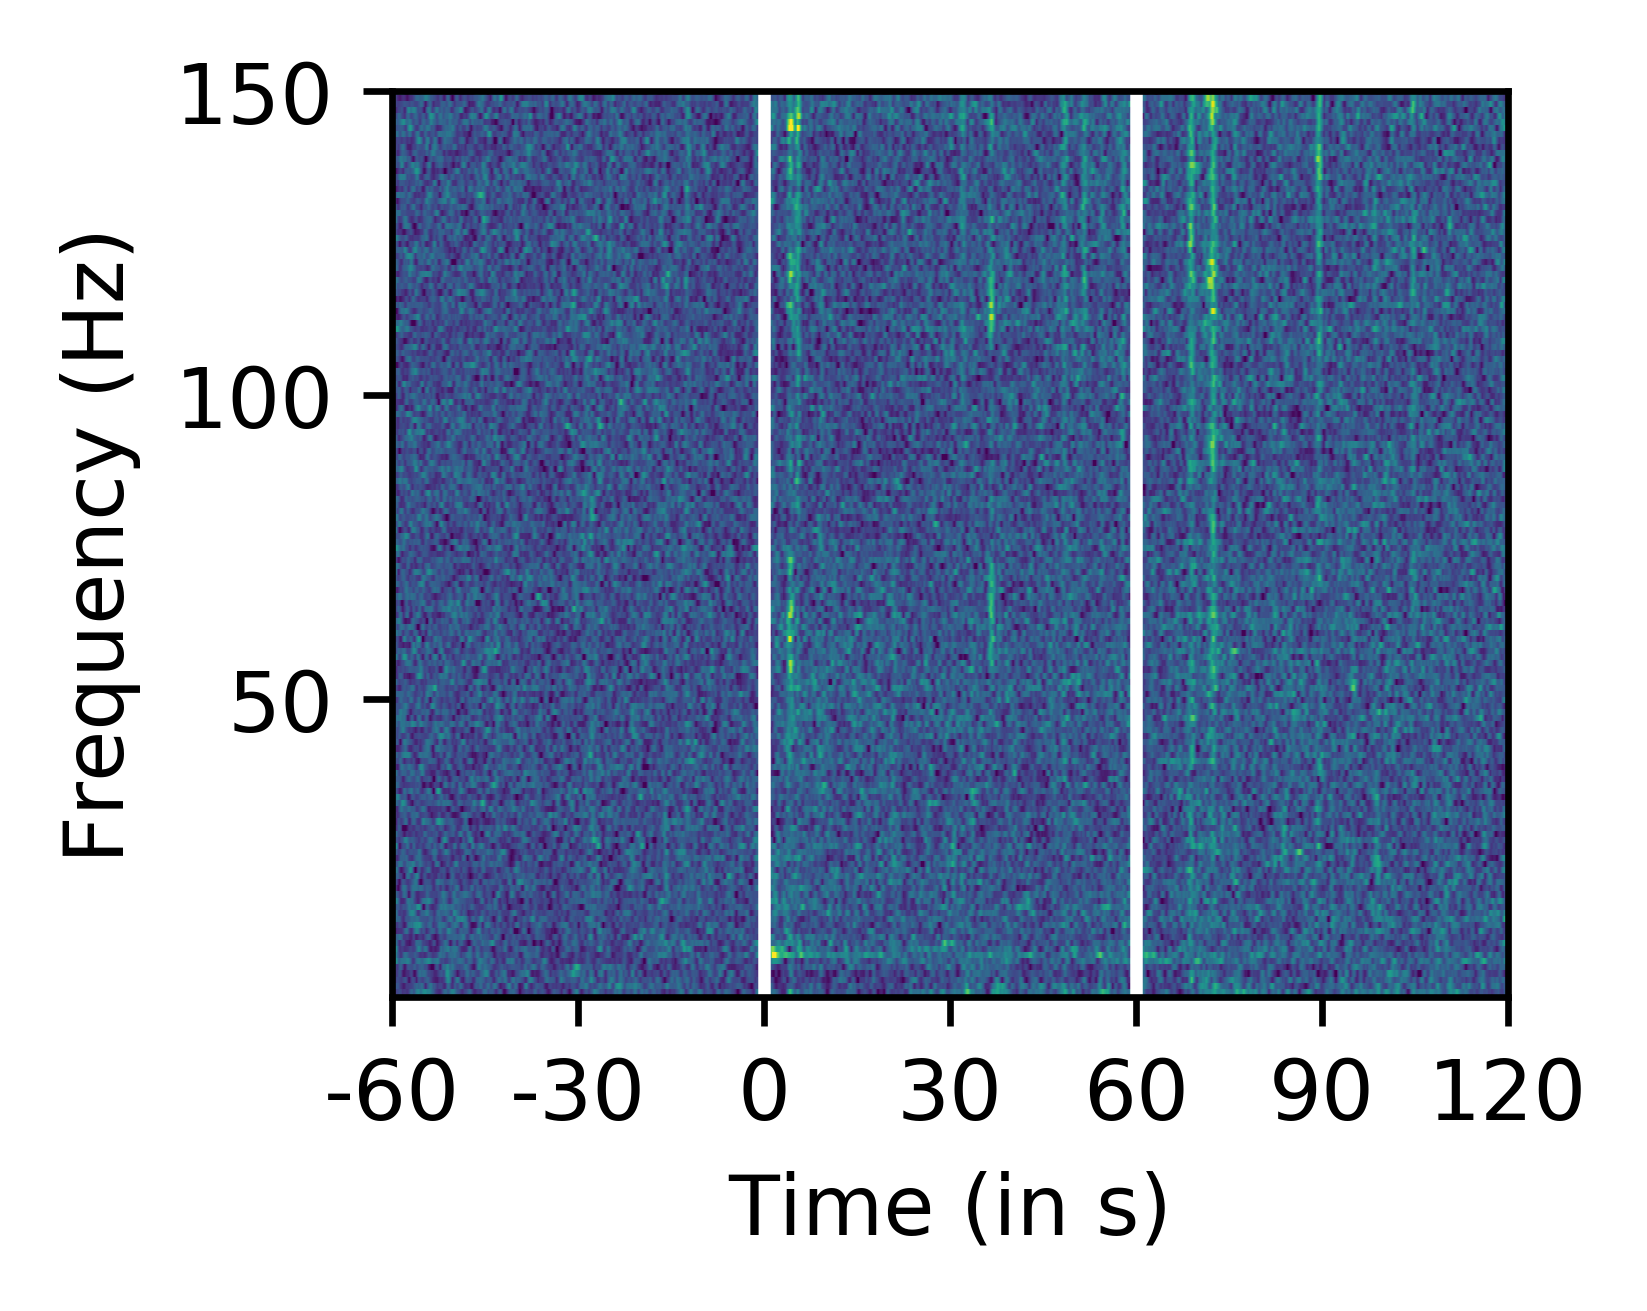

In [58]:
time_before_after=60000
t=np.arange(0,3*time_before_after+1,1)
fig, ax = plt.subplots(1,1,figsize=(3,2),dpi=600)
im=ax.pcolormesh(t,freq,normalized_stim_value.mean(axis=0),cmap='viridis',vmin=-0.5,vmax=1.5)
cb = fig.colorbar(im)
cb.remove()
ax.set_ylim([1,150])
#ax.set_xlim([0,12001])
ax.axvline(x=60001,color='w')
ax.axvline(x=120001,color='w')

ax.set_xticks(np.arange(0,180001,30000))
ax.set_xticklabels(np.arange(-60,121,30)) 
ax.set_xlabel('Time (in s)')
ax.set_ylabel('Frequency (Hz)')
plt.savefig('stim_before_after_hilbert_0_150Hz_2.png',dpi=1200,bbox_inches='tight')